#### Feature Engineering  

Dataset: 

- _calls_feature.csv_
- _internet_feature.csv_
- _messages_feature.csv_
- _users_feature.csv_   

- _calls_duration_periodic_day.csv_
- _internet_periodic_day.csv_
- _messages_periodic_day.csv_
- _revenue_total.csv_   

Author: Luis Sergio Pastrana Lemus  
Date: 2025-05-14

# Exploratory Data Analysis – Purchasing Activity Dataset

## __1. Libraries__

In [1]:
from IPython.display import display, HTML
import numpy as np
import os
import pandas as pd
from pathlib import Path
import sys

# Define project root dynamically, gets the current directory from whick the notebook belongs and moves one level upper
project_root = Path.cwd().parent

# Add src to sys.path if it is not already
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Import function directly (more controlled than import *)
from src import *

## __2. Path to Data file__

In [2]:
# Build route to data file and upload
data_file_path = project_root / "data" / "processed" / "feature"

df_calls_feature = load_dataset_from_csv(data_file_path, "calls_feature.csv", sep=',', header='infer')
df_internet_feature = load_dataset_from_csv(data_file_path, "internet_feature.csv", sep=',', header='infer')
df_messages_feature = load_dataset_from_csv(data_file_path, "messages_feature.csv", sep=',', header='infer')
df_users_feature = load_dataset_from_csv(data_file_path, "users_feature.csv", sep=',', header='infer')

data_file_path = project_root / "data" / "processed" / "activity"

df_calls_duration_periodic_day = load_dataset_from_csv(data_file_path, "calls_duration_periodic_day.csv", sep=',', header='infer')
df_internet_periodic_day = load_dataset_from_csv(data_file_path, "internet_periodic_day.csv", sep=',', header='infer')
df_messages_periodic_day = load_dataset_from_csv(data_file_path, "messages_periodic_day.csv", sep=',', header='infer')
df_revenue_total = load_dataset_from_csv(data_file_path, "revenue_total.csv", sep=',', header='infer')


## __3. Exploratory Data Analysis__

### 3.1  Descriptive Statistics

#### 3.1.1 Descriptive statistics for Original datasets

In [3]:
# Descriptive statistics for calls dataset
df_calls_feature.describe(include='all')

,call_id,user_id,call_date,duration,month,day
count,137735,137735.000000,137735,137735.000000,137735.000000,137735.000000
unique,137735,NaN,351,NaN,NaN,NaN
top,1000_93,NaN,2018-12-27 ...,NaN,NaN,NaN
freq,1,NaN,1091,NaN,NaN,NaN
mean,NaN,1247.658046,NaN,7.146673,9.320797,16.452833
std,NaN,139.416268,NaN,5.953919,2.412550,8.810364
min,NaN,1000.000000,NaN,0.000000,1.000000,1.000000
25%,NaN,1128.000000,NaN,2.000000,8.000000,9.000000
50%,NaN,1247.000000,NaN,6.000000,10.000000,17.000000
75%,NaN,1365.000000,NaN,11.000000,11.000000,24.000000


In [4]:
# Descriptive statistics for messages dataset
df_messages_feature.describe(include='all')

,message_id,user_id,message_date,month,day
count,76051,76051.000000,76051,76051.000000,76051.000000
unique,76051,NaN,351,NaN,NaN
top,1000_125,NaN,2018-12-28 ...,NaN,NaN
freq,1,NaN,702,NaN,NaN
mean,NaN,1245.972768,NaN,9.584016,16.576455
std,NaN,139.843635,NaN,2.276392,8.822974
min,NaN,1000.000000,NaN,1.000000,1.000000
25%,NaN,1123.000000,NaN,8.000000,9.000000
50%,NaN,1251.000000,NaN,10.000000,17.000000
75%,NaN,1362.000000,NaN,12.000000,24.000000


In [5]:
# Descriptive statistics for internet dataset
df_internet_feature.describe(include='all')

,session_id,user_id,session_date,mb_used,month,day
count,104825,104825.000000,104825,104825.000000,104825.000000,104825.000000
unique,104825,NaN,351,NaN,NaN,NaN
top,1000_13,NaN,2018-12-24 ...,NaN,NaN,NaN
freq,1,NaN,851,NaN,NaN,NaN
mean,NaN,1242.496361,NaN,366.713701,9.342552,16.439800
std,NaN,142.053913,NaN,277.170542,2.400404,8.836954
min,NaN,1000.000000,NaN,0.000000,1.000000,1.000000
25%,NaN,1122.000000,NaN,136.080000,8.000000,9.000000
50%,NaN,1236.000000,NaN,343.980000,10.000000,17.000000
75%,NaN,1367.000000,NaN,554.610000,11.000000,24.000000


In [6]:
# Descriptive statistics for users dataset
df_users_feature.describe(include='all')

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,full_name,reg_month,reg_day,churn_month,churn_day
count,500.000000,500,500,500.000000,500,500,500,34,500,500.000000,500.000000,34.000000,34.000000
unique,NaN,458,399,NaN,73,266,2,29,500,NaN,NaN,NaN,NaN
top,NaN,seymour,wilkinson,NaN,new_york_ne...,2018-06-04 ...,surf,2018-12-18 ...,anamaria_bauer,NaN,NaN,NaN,NaN
freq,NaN,3,3,NaN,80,5,339,3,1,NaN,NaN,NaN,NaN
mean,1249.500000,NaN,NaN,45.486000,NaN,NaN,NaN,NaN,NaN,6.290000,15.572000,10.764706,18.441176
std,144.481833,NaN,NaN,16.972269,NaN,NaN,NaN,NaN,NaN,3.438247,8.924804,1.415473,8.004511
min,1000.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,1.000000
25%,1124.750000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,3.000000,8.000000,10.000000,14.000000
50%,1249.500000,NaN,NaN,46.000000,NaN,NaN,NaN,NaN,NaN,6.000000,16.000000,11.000000,18.000000
75%,1374.250000,NaN,NaN,61.000000,NaN,NaN,NaN,NaN,NaN,9.000000,23.250000,12.000000,23.500000


In [7]:
df_revenue_total.describe(include='all')

,user_id,month,total_month_calls,total_month_duration,total_month_messages,total_month_sessions,total_month_traffic,age,city,plan,full_name,churn_month,month_revenue_calls,month_revenue_messages,month_revenue_internet,month_revenue_total
count,2293.000000,2293.000000,2258.000000,2258.000000,1806.000000,2277.000000,2277.000000,2293.000000,2293,2293,2293,158.000000,2293.000000,2293.000000,2293.000000,2293.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,2,490,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,new_york_ne...,surf,clementina_...,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,377,1573,12,NaN,NaN,NaN,NaN,NaN
mean,1246.075883,9.172700,60.998671,435.937555,42.110188,46.036451,17372.859025,45.428260,NaN,NaN,NaN,10.341772,1.264828,0.144322,27.764570,64.873676
std,143.051927,2.496386,31.770869,231.972343,33.122931,19.275885,7869.052492,16.764349,NaN,NaN,NaN,1.381277,3.233992,0.493515,49.460566,47.417238
min,1000.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1000.000000,18.000000,NaN,NaN,NaN,7.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,8.000000,39.000000,275.000000,17.000000,35.000000,13000.000000,30.000000,NaN,NaN,NaN,9.000000,0.000000,0.000000,0.000000,25.340000
50%,1245.000000,10.000000,60.000000,429.000000,34.000000,48.000000,17000.000000,46.000000,NaN,NaN,NaN,11.000000,0.000000,0.000000,0.000000,70.000000
75%,1368.000000,11.000000,80.000000,574.750000,59.000000,58.000000,22000.000000,61.000000,NaN,NaN,NaN,11.000000,0.000000,0.000000,43.960000,70.000000


<table>
  <thead>
    <tr>
      <th>CV (%)</th>
      <th>Interpretation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><small><strong>0–10%</strong></small></td>
      <td><small><strong>Very low</strong> variability → <strong>very reliable</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>10–20%</strong></small></td>
      <td><small><strong>Moderate</strong> variability → <strong>reliable</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>20–30%</strong></small></td>
      <td><small><strong>Considerable</strong> variability → <strong>some what skewed</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>>30%</strong></small></td>
      <td><small>High<strong> variability</strong> → <strong>prefer</strong> Median</small></td>
    </tr>
  </tbody>
</table>


#### 3.1.2 Descriptive statistics for Calls duration

In [8]:
df_revenue_total['total_month_duration'].describe()

count    2258.000000
mean      435.937555
std       231.972343
min         0.000000
25%       275.000000
50%       429.000000
75%       574.750000
max      1510.000000
Name: total_month_duration, dtype: float64

In [9]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_revenue_total, 'total_month_duration')

In [10]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_revenue_total, 'total_month_duration', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [user_id, month, total_month_calls, total_month_duration, total_month_messages, total_month_sessions, total_month_traffic, age, city, plan, full_name, churn_month, month_revenue_calls, month_revenue_messages, month_revenue_internet, month_revenue_total]
 Index: [],
       user_id  month  total_month_calls  total_month_duration  total_month_messages  total_month_sessions  total_month_traffic  age            city  \
 9        1003     12           149.0             1104.0                  50.0                  52.0               28000.0        52   tulsa,_ok_msa   
 57       1014     12           150.0             1114.0                  64.0                  19.0                8000.0        61  new_york_ne...   
 217      1052     12           177.0             1200.0                 266.0                  51.0               27000.0        47  houston_the...   
 248      1057     10           162.0             1117.0                 131.0                  56.

#### 3.1.3 Descriptive statistics for Calls amount

In [11]:
df_revenue_total['total_month_calls'].describe()

count    2258.000000
mean       60.998671
std        31.770869
min         1.000000
25%        39.000000
50%        60.000000
75%        80.000000
max       205.000000
Name: total_month_calls, dtype: float64

In [12]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_revenue_total, 'total_month_calls')

In [13]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_revenue_total, 'total_month_calls', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [user_id, month, total_month_calls, total_month_duration, total_month_messages, total_month_sessions, total_month_traffic, age, city, plan, full_name, churn_month, month_revenue_calls, month_revenue_messages, month_revenue_internet, month_revenue_total]
 Index: [],
       user_id  month  total_month_calls  total_month_duration  total_month_messages  total_month_sessions  total_month_traffic  age            city  \
 9        1003     12           149.0             1104.0                  50.0                  52.0               28000.0        52   tulsa,_ok_msa   
 57       1014     12           150.0             1114.0                  64.0                  19.0                8000.0        61  new_york_ne...   
 217      1052     12           177.0             1200.0                 266.0                  51.0               27000.0        47  houston_the...   
 248      1057     10           162.0             1117.0                 131.0                  56.

#### 3.1.4 Descriptive statistics for Messages

In [14]:
df_revenue_total['total_month_messages'].describe()

count    1806.000000
mean       42.110188
std        33.122931
min         1.000000
25%        17.000000
50%        34.000000
75%        59.000000
max       266.000000
Name: total_month_messages, dtype: float64

In [15]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_revenue_total, 'total_month_messages')

In [16]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_revenue_total, 'total_month_messages', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [user_id, month, total_month_calls, total_month_duration, total_month_messages, total_month_sessions, total_month_traffic, age, city, plan, full_name, churn_month, month_revenue_calls, month_revenue_messages, month_revenue_internet, month_revenue_total]
 Index: [],
       user_id  month  total_month_calls  total_month_duration  total_month_messages  total_month_sessions  total_month_traffic  age            city  \
 20       1006     12             9.0               59.0                 139.0                  63.0               33000.0        73  san_francis...   
 71       1019     12            59.0              467.0                 128.0                  83.0               29000.0        34  jacksonvill...   
 217      1052     12           177.0             1200.0                 266.0                  51.0               27000.0        47  houston_the...   
 248      1057     10           162.0             1117.0                 131.0                  56.

#### 3.1.5 Descriptive statistics for Internet sessions

In [17]:
df_revenue_total['total_month_sessions'].describe()

count    2277.000000
mean       46.036451
std        19.275885
min         1.000000
25%        35.000000
50%        48.000000
75%        58.000000
max       138.000000
Name: total_month_sessions, dtype: float64

In [18]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_revenue_total, 'total_month_sessions')

In [19]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_revenue_total, 'total_month_sessions', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [user_id, month, total_month_calls, total_month_duration, total_month_messages, total_month_sessions, total_month_traffic, age, city, plan, full_name, churn_month, month_revenue_calls, month_revenue_messages, month_revenue_internet, month_revenue_total]
 Index: [],
       user_id  month  total_month_calls  total_month_duration  total_month_messages  total_month_sessions  total_month_traffic  age            city  \
 409      1084     12           103.0              720.0                  81.0                  94.0               28000.0        21  miami_fort_...   
 570      1121     12             NaN                NaN                  97.0                 135.0               67000.0        34  miami_fort_...   
 893      1185     12            84.0              571.0                   NaN                  95.0               28000.0        47  louisville_...   
 1128     1240      8           161.0             1095.0                  15.0                  96.

#### 3.1.6 Descriptive statistics for Internet traffic

In [20]:
df_revenue_total['total_month_traffic'].describe()

count     2277.000000
mean     17372.859025
std       7869.052492
min       1000.000000
25%      13000.000000
50%      17000.000000
75%      22000.000000
max      71000.000000
Name: total_month_traffic, dtype: float64

In [21]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_revenue_total, 'total_month_traffic')

In [22]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_revenue_total, 'total_month_traffic', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [user_id, month, total_month_calls, total_month_duration, total_month_messages, total_month_sessions, total_month_traffic, age, city, plan, full_name, churn_month, month_revenue_calls, month_revenue_messages, month_revenue_internet, month_revenue_total]
 Index: [],
       user_id  month  total_month_calls  total_month_duration  total_month_messages  total_month_sessions  total_month_traffic  age            city  \
 23       1007     10            80.0              645.0                  59.0                  65.0               38000.0        42  grand_rapid...   
 95       1028      3             6.0               39.0                  66.0                  64.0               37000.0        57  philadelphi...   
 96       1028      4             7.0               53.0                  77.0                  73.0               38000.0        57  philadelphi...   
 98       1028      6            11.0               49.0                  66.0                  67.

### 3.2 Data Visualization: Distributions and Relationships

#### 3.2.1 Covariance and Correlation Analysis 

##### 3.2.1.1 Covariance Matrix

In [23]:
# Covariance for services
df_revenue_total[['total_month_calls', 'total_month_duration', 'total_month_messages', 'total_month_sessions', 'total_month_traffic']].cov()

,total_month_calls,total_month_duration,total_month_messages,total_month_sessions,total_month_traffic
total_month_calls,1009.388124,7226.644578,308.331256,181.068229,8.597122e+04
total_month_duration,7226.644578,53811.168009,2247.620350,1284.098132,6.093701e+05
total_month_messages,308.331256,2247.620350,1097.128572,101.653722,8.253380e+04
total_month_sessions,181.068229,1284.098132,101.653722,371.559743,1.285136e+05
total_month_traffic,85971.217024,609370.051261,82533.797479,128513.643542,6.192199e+07


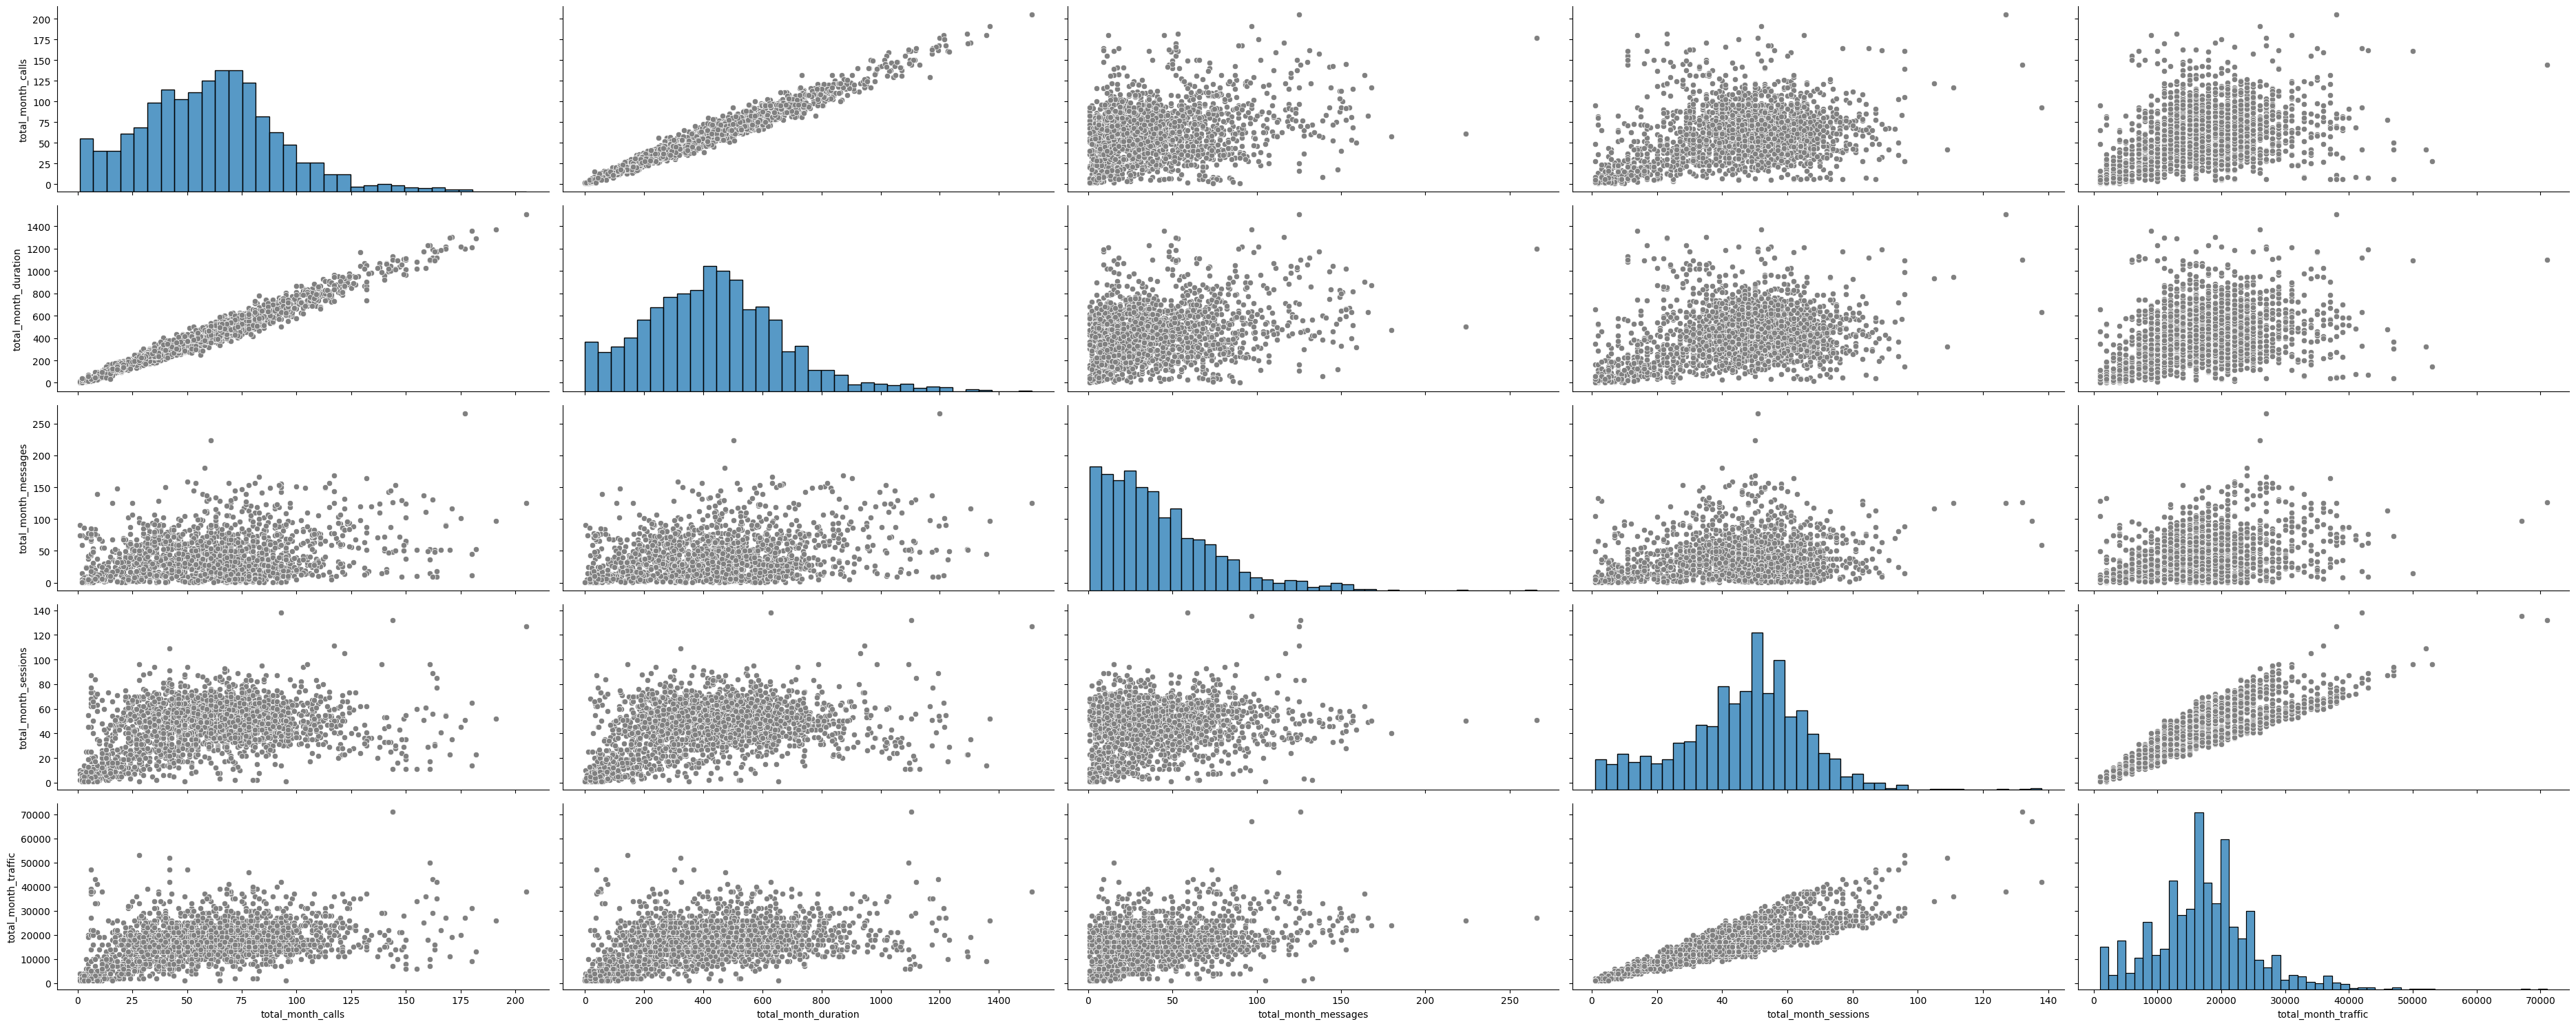

In [24]:
plot_pairplot(df_revenue_total[['total_month_calls', 'total_month_duration', 'total_month_messages', 'total_month_sessions', 'total_month_traffic']])

In [25]:
# Covariance for revenue
df_revenue_total[['month_revenue_calls', 'month_revenue_messages', 'month_revenue_internet', 'month_revenue_total']].cov()

,month_revenue_calls,month_revenue_messages,month_revenue_internet,month_revenue_total
month_revenue_calls,10.458701,0.467891,41.571541,32.631729
month_revenue_messages,0.467891,0.243558,5.092338,3.536951
month_revenue_internet,41.571541,5.092338,2446.347617,2094.313183
month_revenue_total,32.631729,3.536951,2094.313183,2248.394451


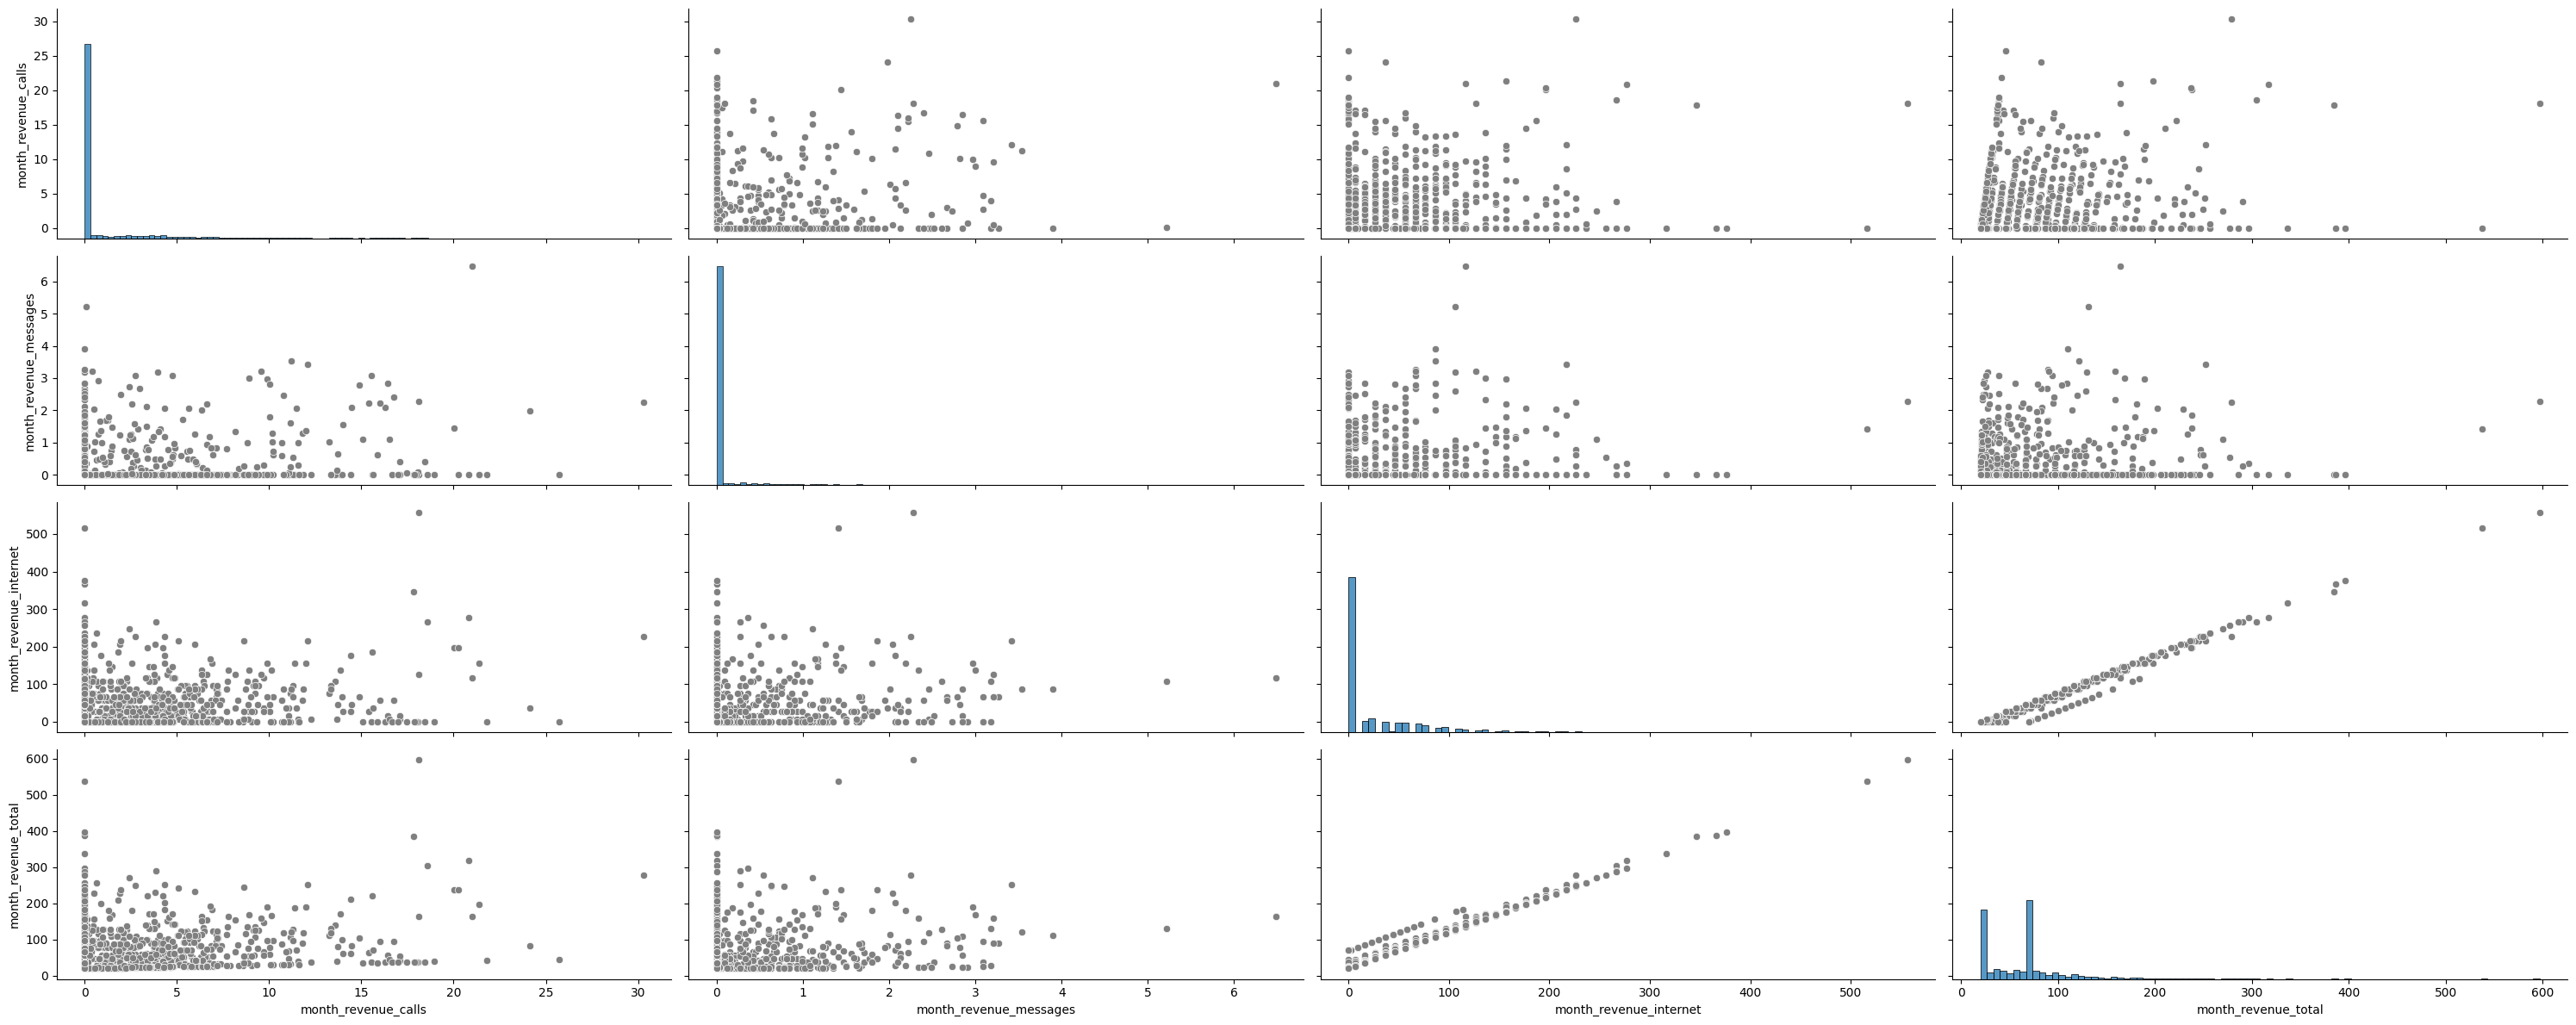

In [26]:
plot_pairplot(df_revenue_total[['month_revenue_calls', 'month_revenue_messages', 'month_revenue_internet', 'month_revenue_total']])

##### 3.2.1.2 Correlation Matrix

| Correlation Value     | Interpretation                |
| --------------------- | ----------------------------- |
| `+0.7` to `+1.0`      | Strong positive correlation   |
| `+0.3` to `+0.7`      | Moderate positive correlation |
| `0.0` to `+0.3`       | Weak positive correlation     |
| `0`                   | No correlation                |
| `-0.3` to `0`         | Weak negative correlation     |
| `-0.7` to `-0.3`      | Moderate negative correlation |
| `-1.0` to `-0.7`      | Strong negative correlation   |


In [27]:
# Correlation for services
df_revenue_total[['total_month_calls', 'total_month_duration', 'total_month_messages', 'total_month_sessions', 'total_month_traffic']].corr()

,total_month_calls,total_month_duration,total_month_messages,total_month_sessions,total_month_traffic
total_month_calls,1.000000,0.980554,0.282255,0.299098,0.350473
total_month_duration,0.980554,1.000000,0.281633,0.290439,0.340148
total_month_messages,0.282255,0.281633,1.000000,0.162570,0.322180
total_month_sessions,0.299098,0.290439,0.162570,1.000000,0.847252
total_month_traffic,0.350473,0.340148,0.322180,0.847252,1.000000


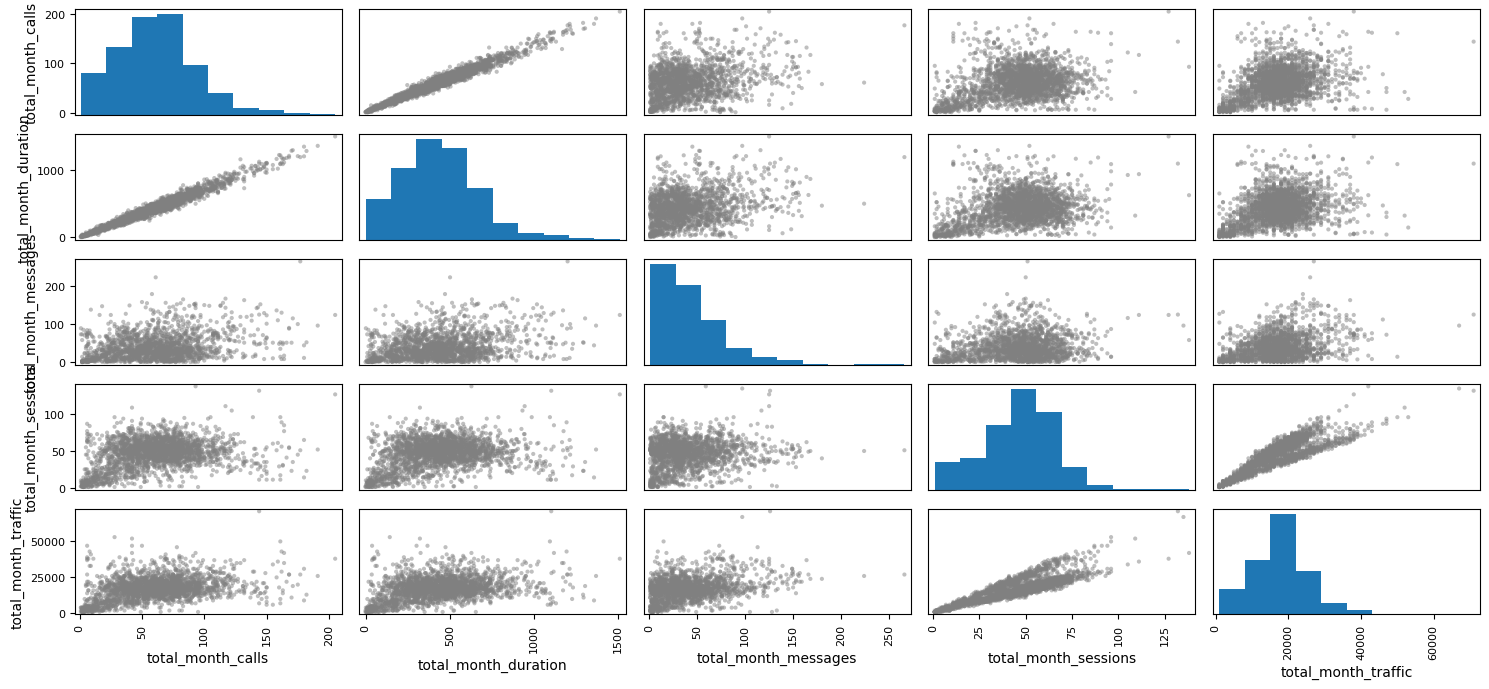

In [28]:
plot_scatter_matrix(df_revenue_total[['total_month_calls', 'total_month_duration', 'total_month_messages', 'total_month_sessions', 'total_month_traffic']])

In [29]:
evaluate_correlation(df_revenue_total)

In [30]:
# Correlation for revenue
df_revenue_total[['month_revenue_calls', 'month_revenue_messages', 'month_revenue_internet', 'month_revenue_total']].corr()

,month_revenue_calls,month_revenue_messages,month_revenue_internet,month_revenue_total
month_revenue_calls,1.000000,0.293160,0.259895,0.212797
month_revenue_messages,0.293160,1.000000,0.208621,0.151144
month_revenue_internet,0.259895,0.208621,1.000000,0.892989
month_revenue_total,0.212797,0.151144,0.892989,1.000000


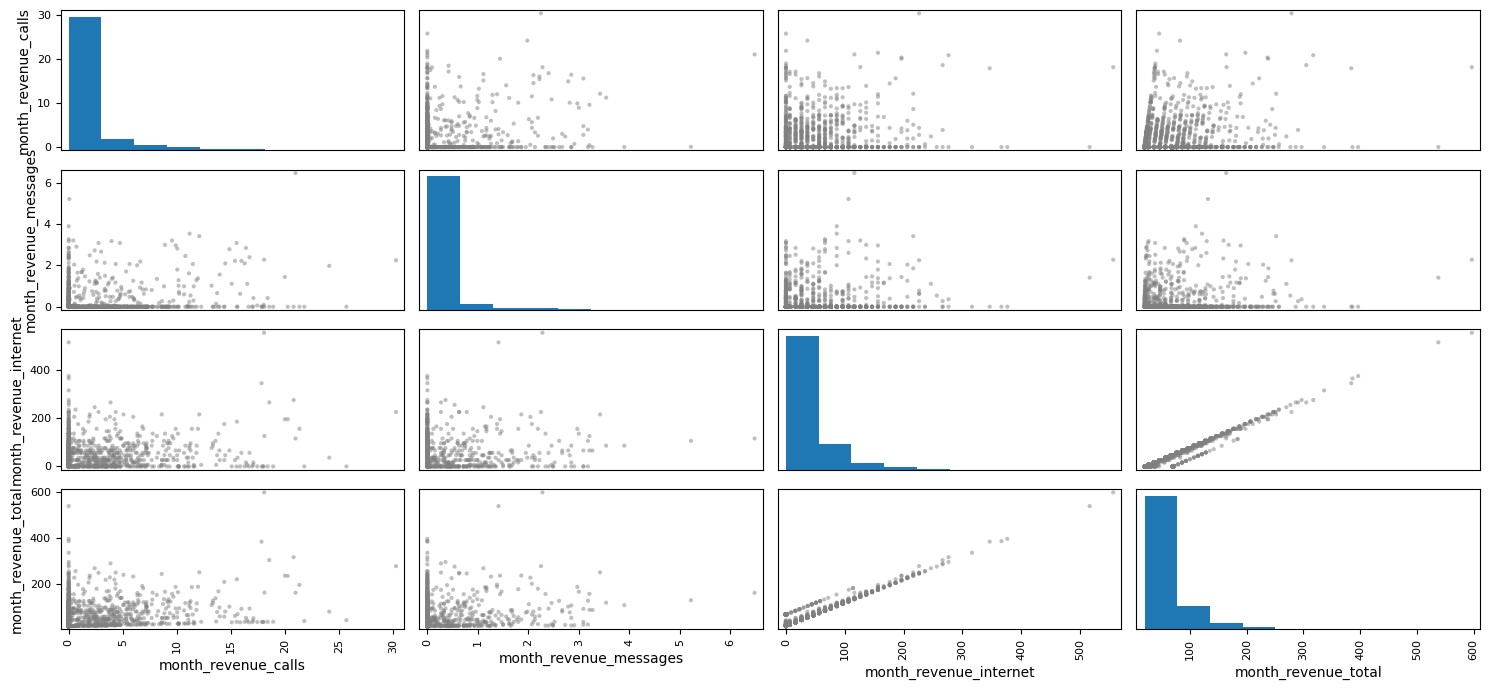

In [31]:
plot_scatter_matrix(df_revenue_total[['month_revenue_calls', 'month_revenue_messages', 'month_revenue_internet', 'month_revenue_total']])

In [32]:
evaluate_correlation(df_revenue_total)

### 3.3 Data Visualization: Data dispersion and outliers

3.3.1 Data dispersion and outliers for Calls Duration

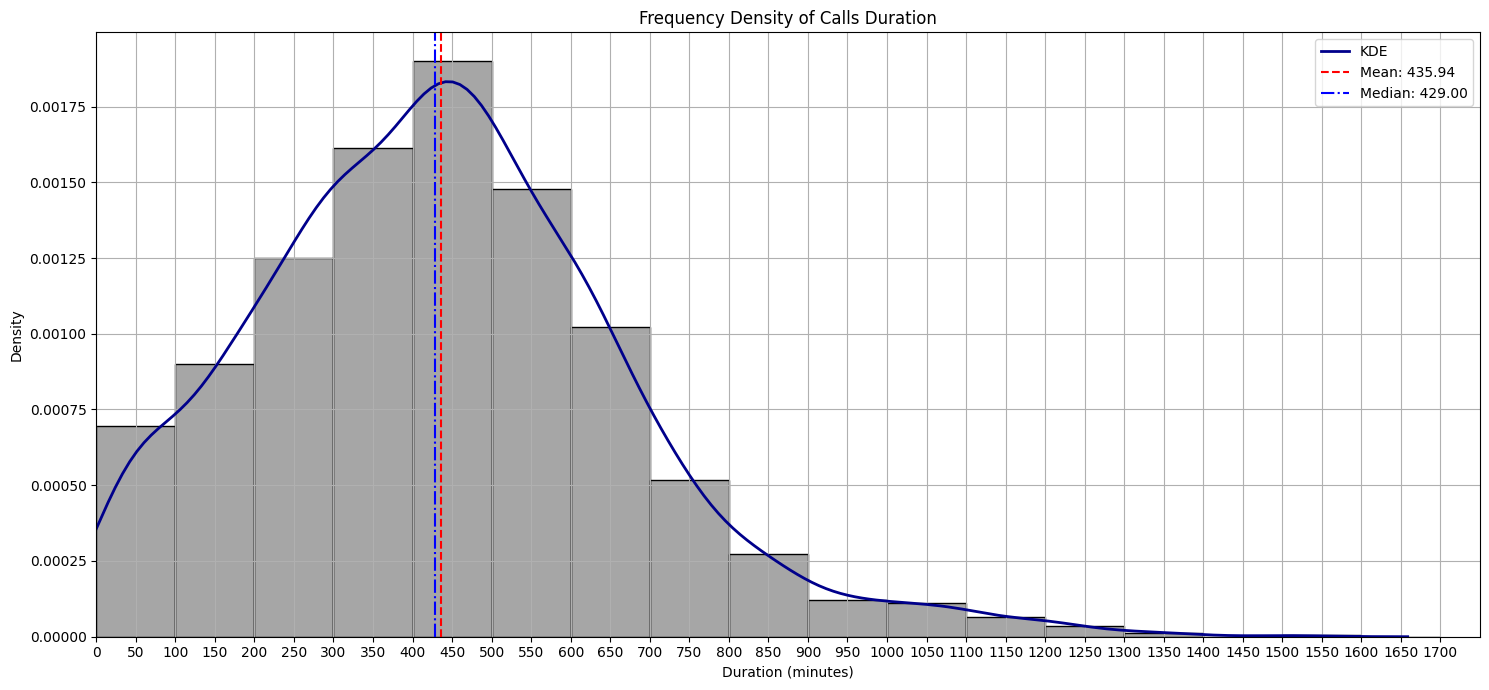

In [33]:
# Calls duration Frequency density
plot_frequency_density(df_revenue_total['total_month_duration'], bins=np.arange(0, 1750, 100), color='grey', title='Frequency Density of Calls Duration', xlabel='Duration (minutes)',
                       ylabel='Density', xticks_range=(0, 1750, 50), show_kde=True, rotation=0)

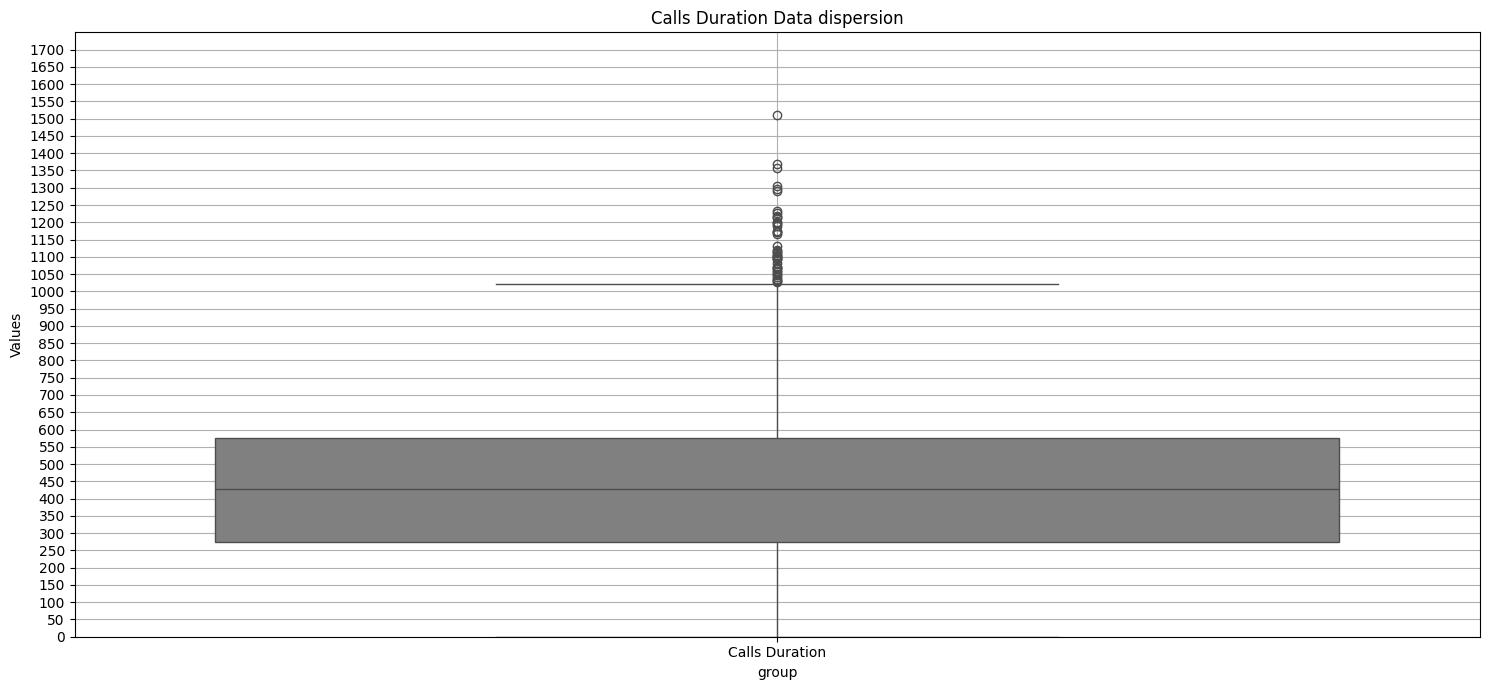

In [34]:
# Calls duration data dispersion
plot_boxplots(ds_list=[df_revenue_total['total_month_duration']], xlabels=['Calls Duration'], ylabel='Values', 
              title='Calls Duration Data dispersion', yticks_range=(0, 1750, 50), rotation=0, color=['grey'])

3.3.2 Data dispersion and outliers for messages amount

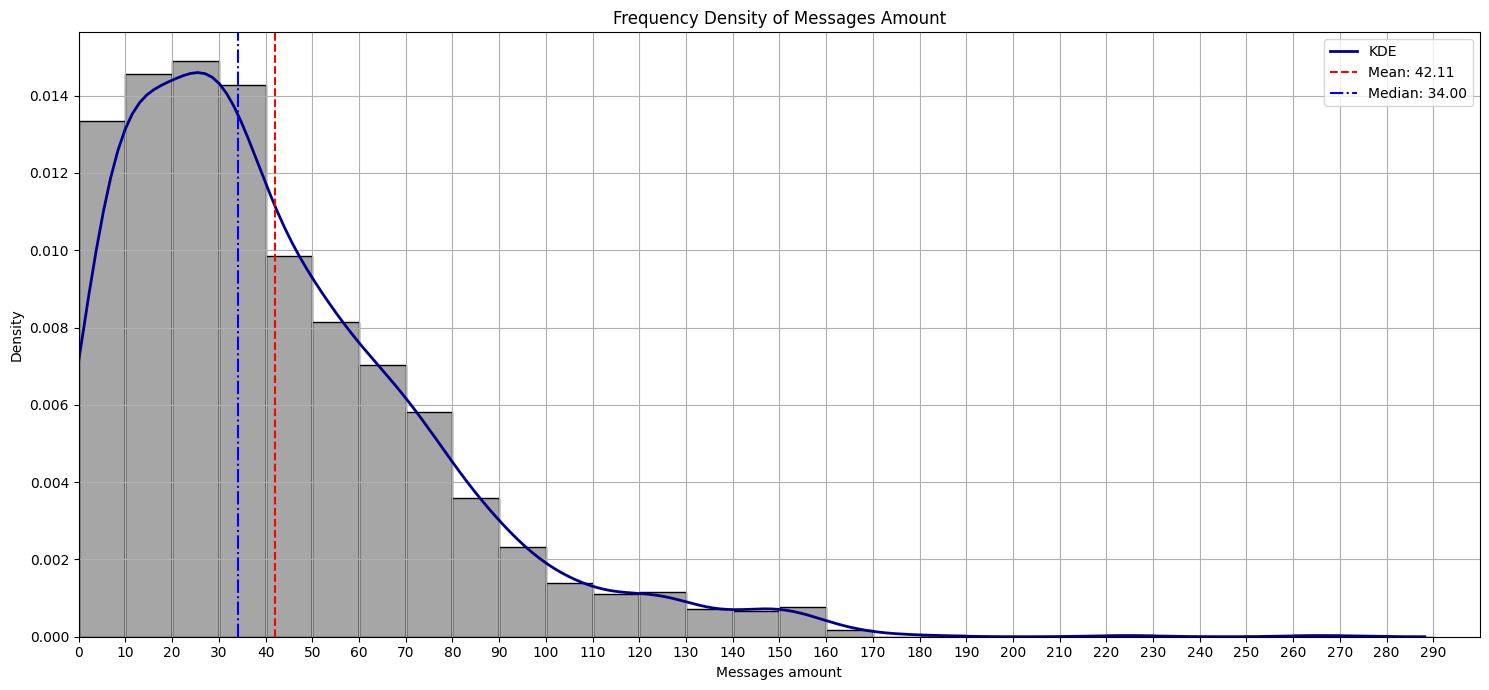

In [35]:
# Messages amount Frequency density
plot_frequency_density(df_revenue_total['total_month_messages'], bins=np.arange(0, 300, 10), color='grey', title='Frequency Density of Messages Amount', xlabel='Messages amount',
                       ylabel='Density', xticks_range=(0, 300, 10), show_kde=True, rotation=0)

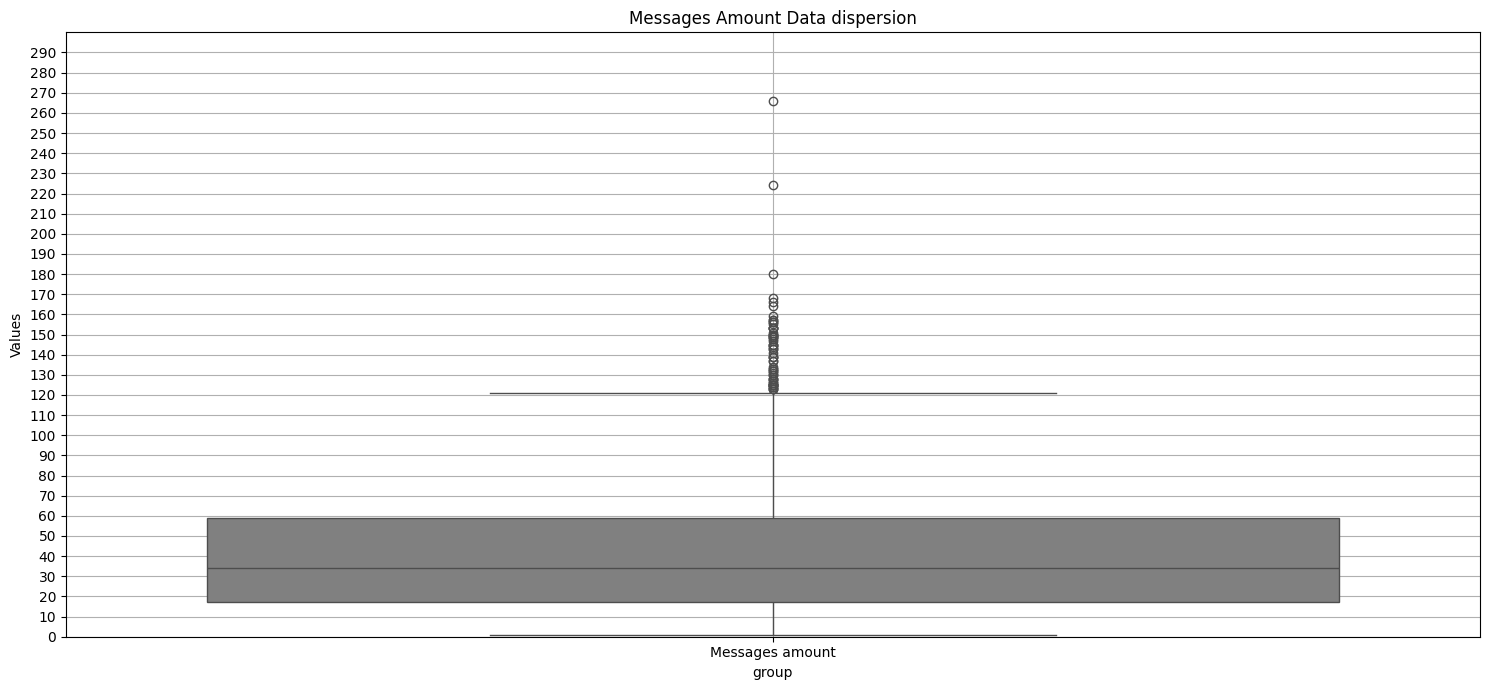

In [36]:
# Messages amount data dispersion
plot_boxplots(ds_list=[df_revenue_total['total_month_messages']], xlabels=['Messages amount'], ylabel='Values', 
              title='Messages Amount Data dispersion', yticks_range=(0, 300, 10), rotation=0, color=['grey'])

3.3.3 Data dispersion and outliers for traffic amount

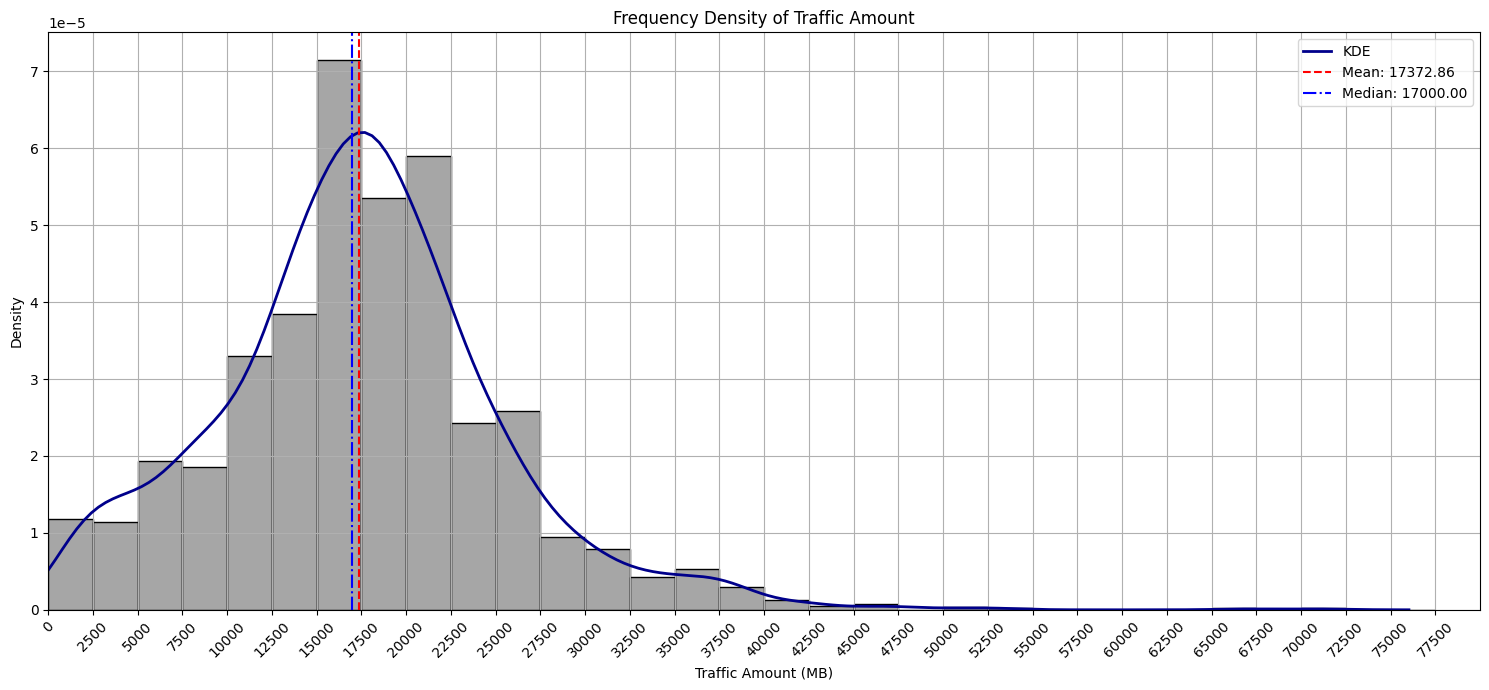

In [ ]:
# Traffic amount Frequency density
plot_frequency_density(df_revenue_total['total_month_traffic'], bins=np.arange(0, 80000, 2500), color='grey', title='Frequency Density of Traffic Amount', xlabel='Traffic Amount (MB)',
                       ylabel='Density', xticks_range=(0, 80000, 2500), show_kde=True, rotation=45)

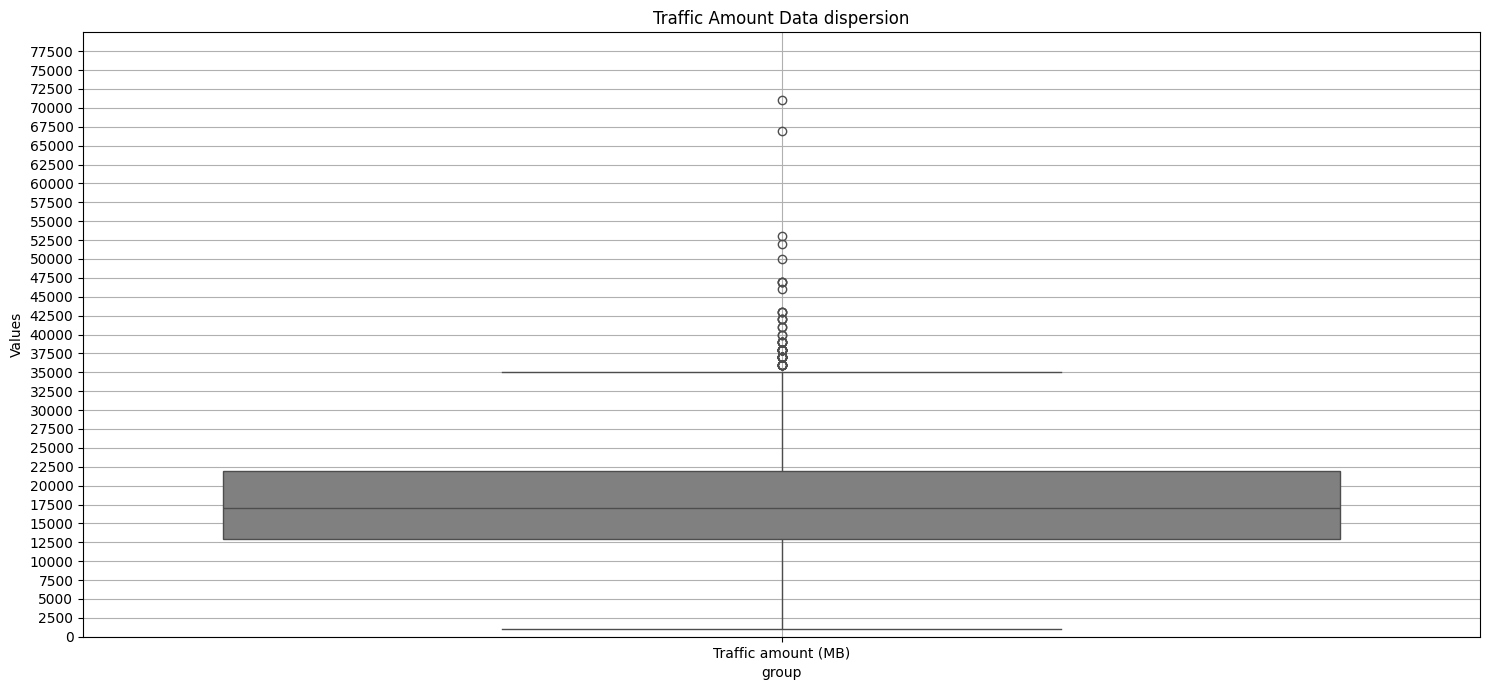

In [38]:
# Traffic amount data dispersion
plot_boxplots(ds_list=[df_revenue_total['total_month_traffic']], xlabels=['Traffic amount (MB)'], ylabel='Values', 
              title='Traffic Amount Data dispersion', yticks_range=(0, 80000, 2500), rotation=0, color=['grey'])

3.3.4 Data dispersion and outliers for calls revenue

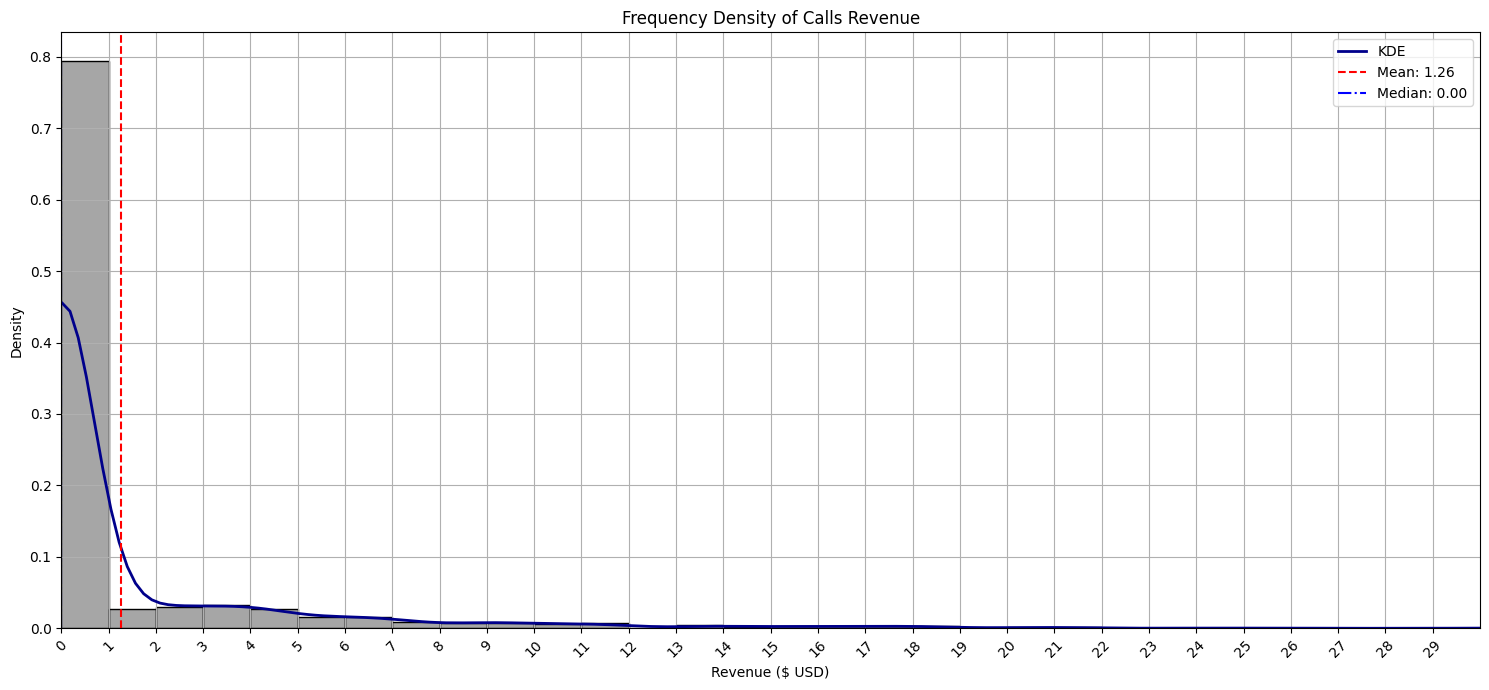

In [85]:
# Calls revenue Frequency density
plot_frequency_density(df_revenue_total['month_revenue_calls'], bins=np.arange(0, 30, 1), color='grey', title='Frequency Density of Calls Revenue', xlabel='Revenue ($ USD)',
                       ylabel='Density', xticks_range=(0, 30, 1), show_kde=True, rotation=45)

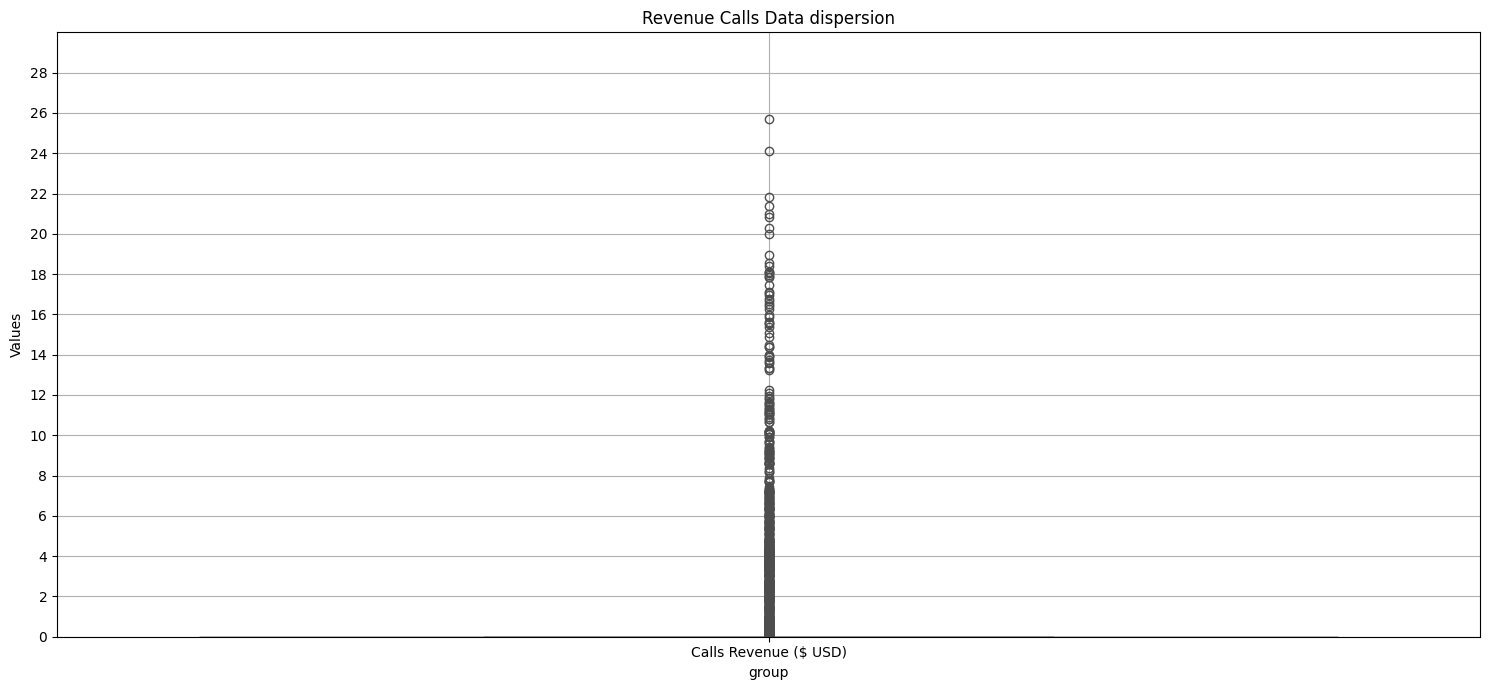

In [87]:
# Calls revenue data dispersion
plot_boxplots(ds_list=[df_revenue_total['month_revenue_calls']], xlabels=['Calls Revenue ($ USD)'], ylabel='Values', 
              title='Revenue Calls Data dispersion', yticks_range=(0, 30, 2), rotation=0, color=['grey'])

3.3.4 Data dispersion and outliers for messages revenue

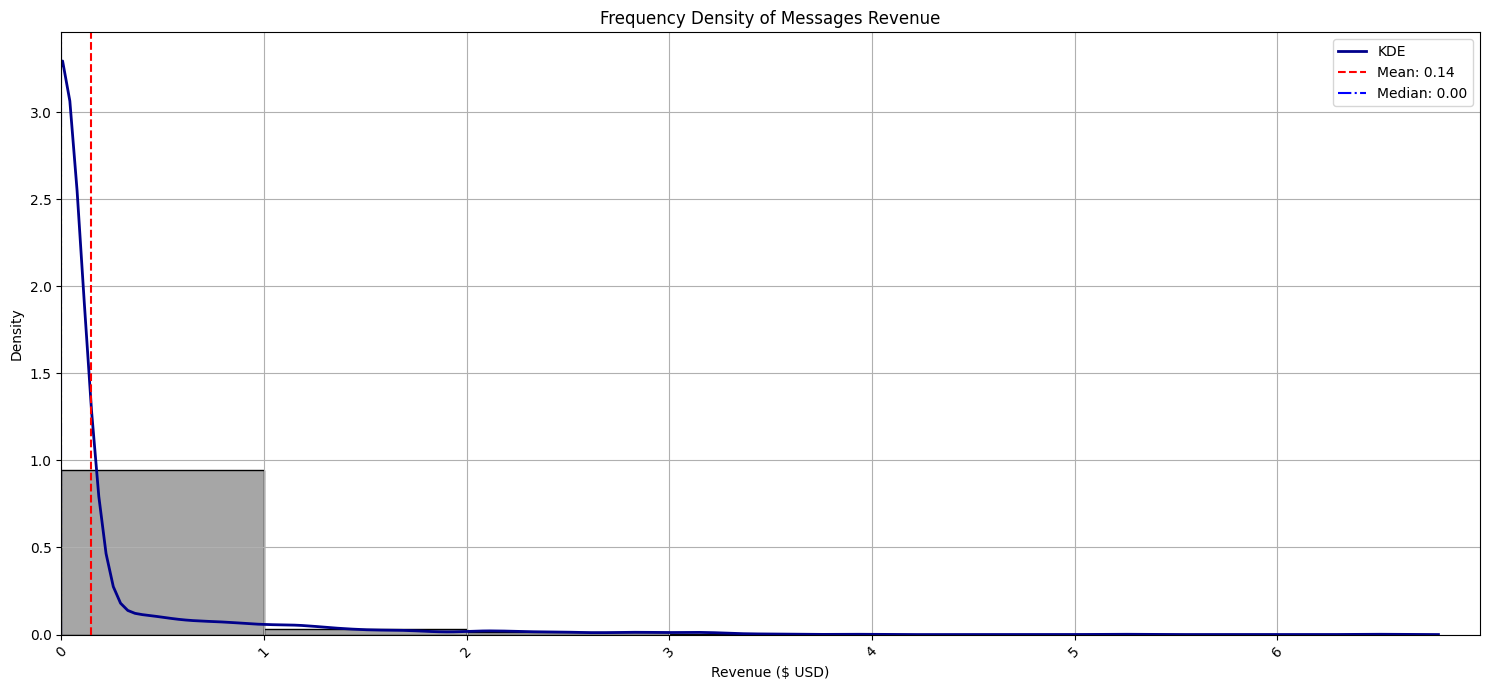

In [90]:
# Messages revenue Frequency density
plot_frequency_density(df_revenue_total['month_revenue_messages'], bins=np.arange(0, 7, 1), color='grey', title='Frequency Density of Messages Revenue', xlabel='Revenue ($ USD)',
                       ylabel='Density', xticks_range=(0, 7, 1), show_kde=True, rotation=45)

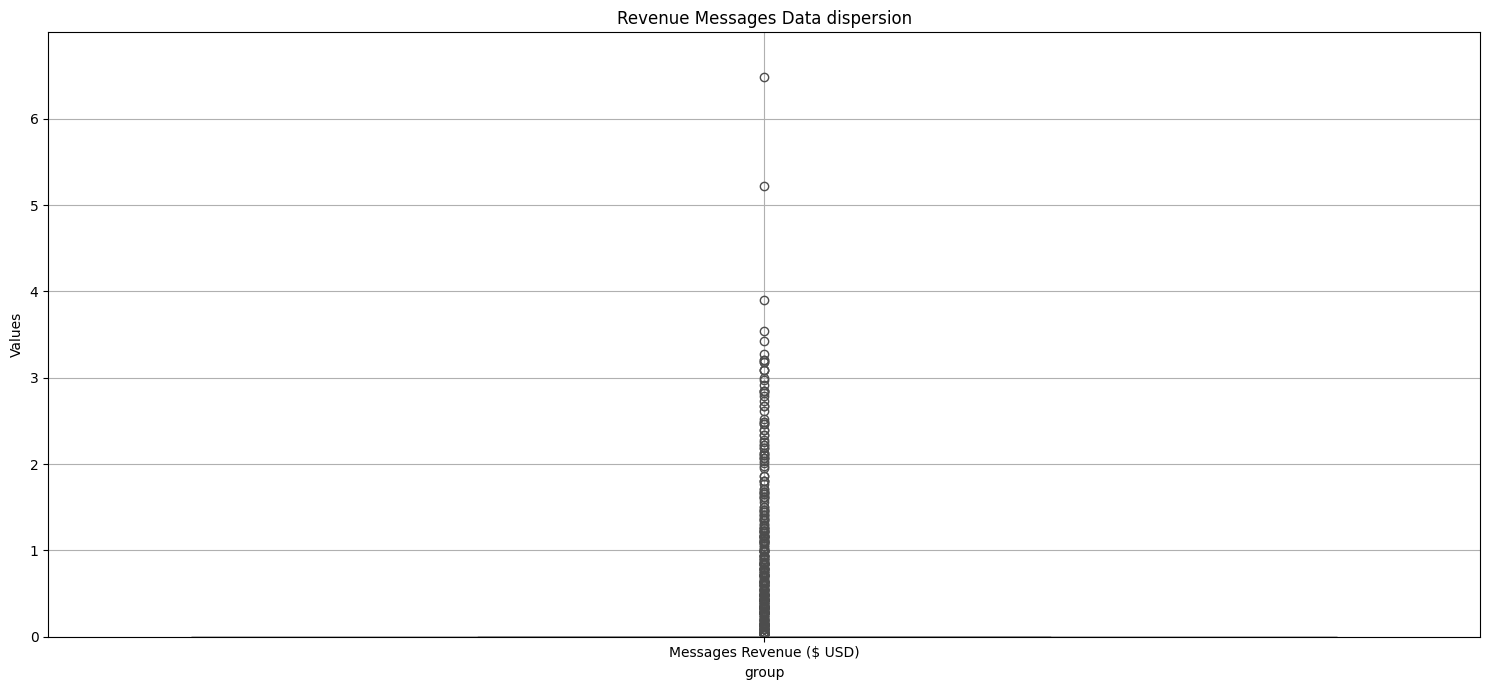

In [96]:
# Messages revenue data dispersion
plot_boxplots(ds_list=[df_revenue_total['month_revenue_messages']], xlabels=['Messages Revenue ($ USD)'], ylabel='Values', 
              title='Revenue Messages Data dispersion', yticks_range=(0, 7, 1), rotation=0, color=['grey'])

3.3.4 Data dispersion and outliers for Internet revenue

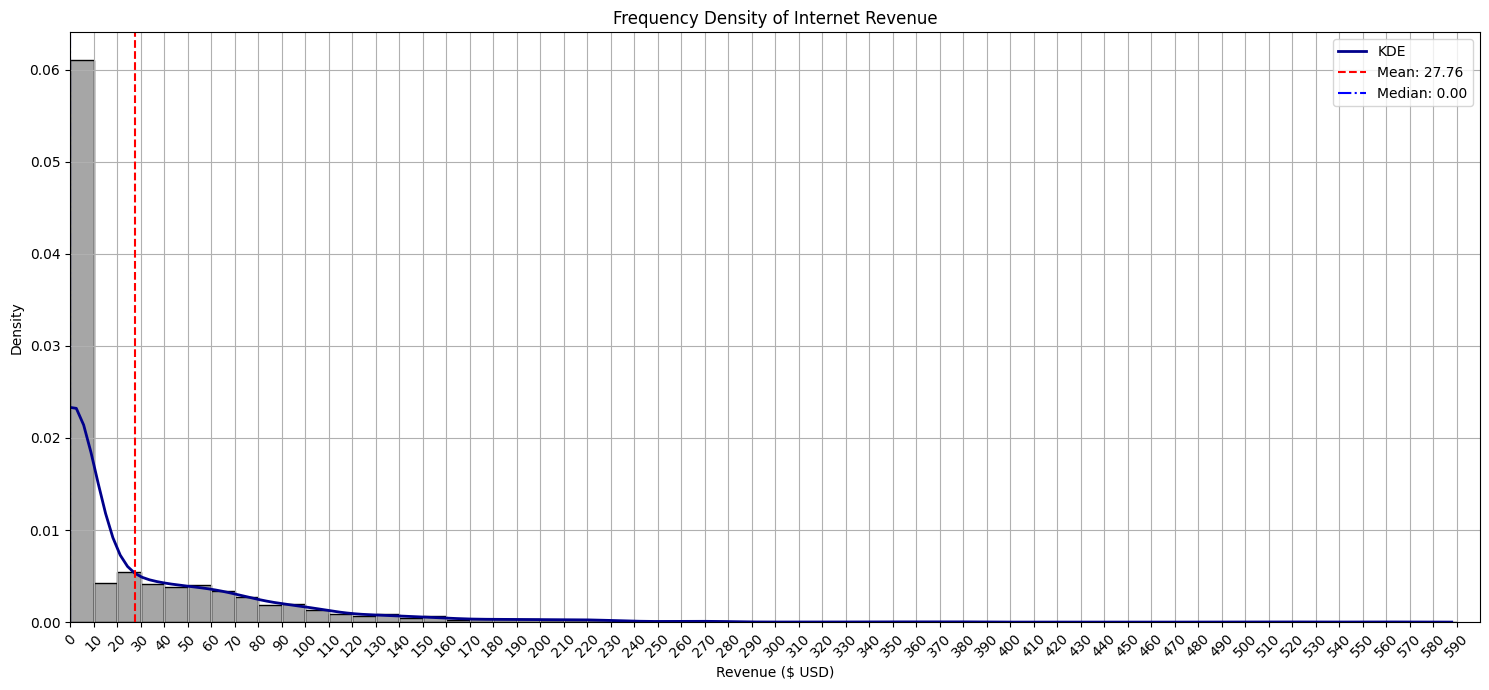

In [98]:
# Internet revenue Frequency density
plot_frequency_density(df_revenue_total['month_revenue_internet'], bins=np.arange(0, 600, 10), color='grey', title='Frequency Density of Internet Revenue', xlabel='Revenue ($ USD)',
                       ylabel='Density', xticks_range=(0, 600, 10), show_kde=True, rotation=45)

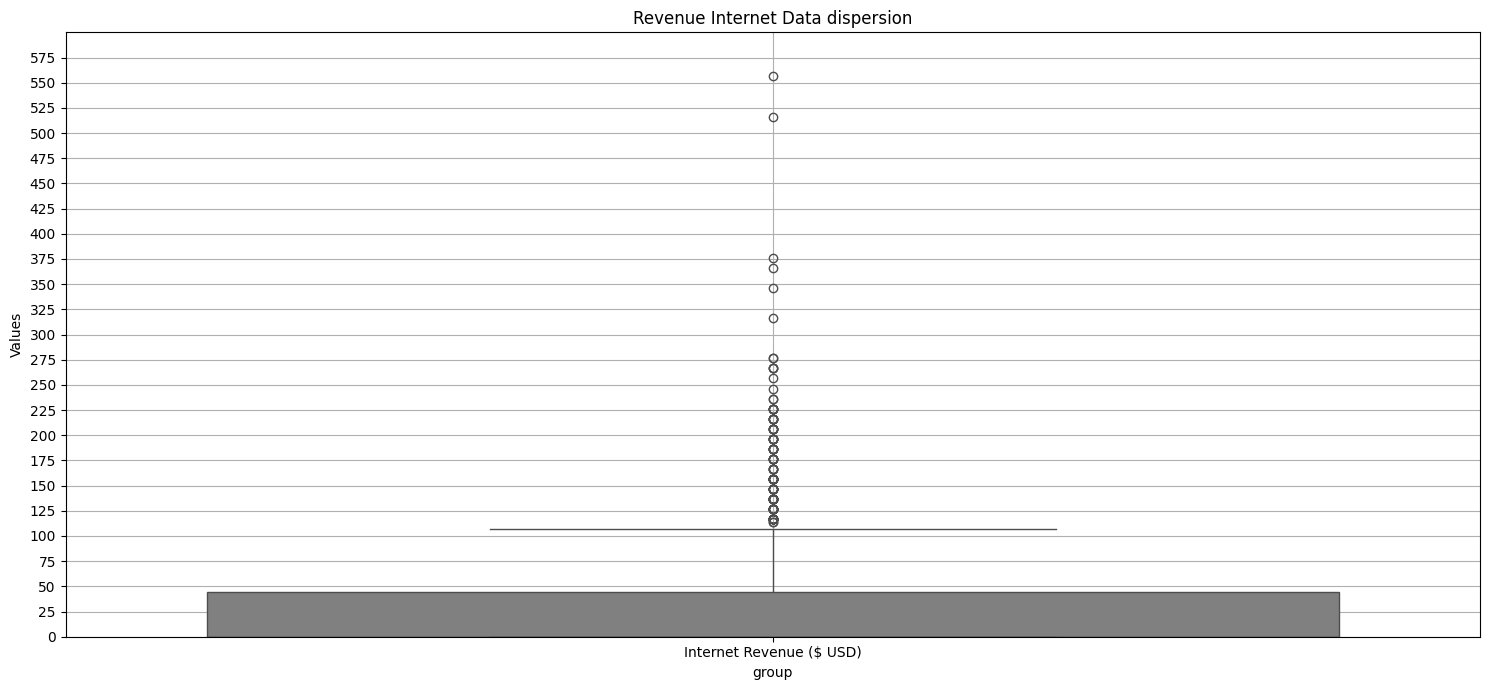

In [100]:
# Internet revenue data dispersion
plot_boxplots(ds_list=[df_revenue_total['month_revenue_internet']], xlabels=['Internet Revenue ($ USD)'], ylabel='Values', 
              title='Revenue Internet Data dispersion', yticks_range=(0, 600, 25), rotation=0, color=['grey'])

#### 3.4 Data visualization for Services activity per day

3.4.1 Data visalization for Calls duration acivity per day and month

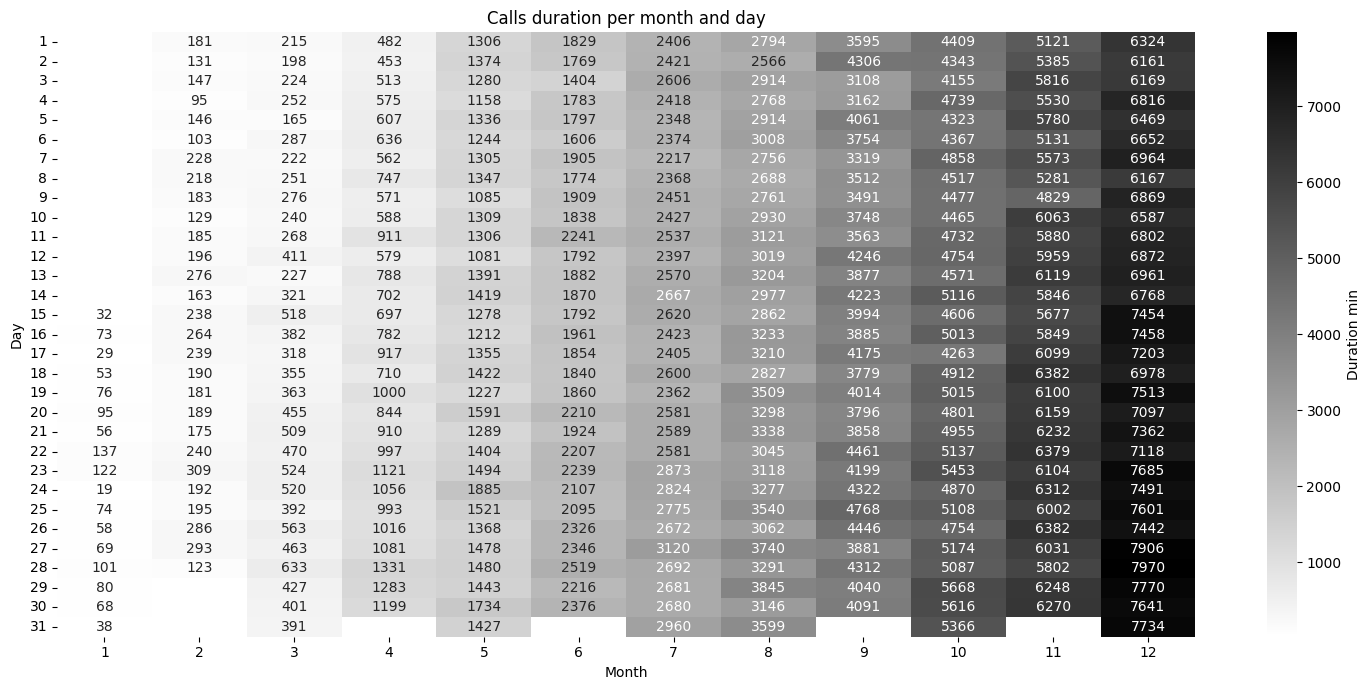

In [39]:
# Calls Activity per day and month
heatmap_data = df_calls_duration_periodic_day.pivot(index='day', columns= 'month', values='calls_duration')

plot_heatmap(heatmap_data, annot=True, title='Calls duration per month and day', xlabel='Month', ylabel='Day', cmap='binary', 
             cbar_label='Duration min', fmt='.0f')


3.4.2 Data visalization for Messages amount acivity per day and month

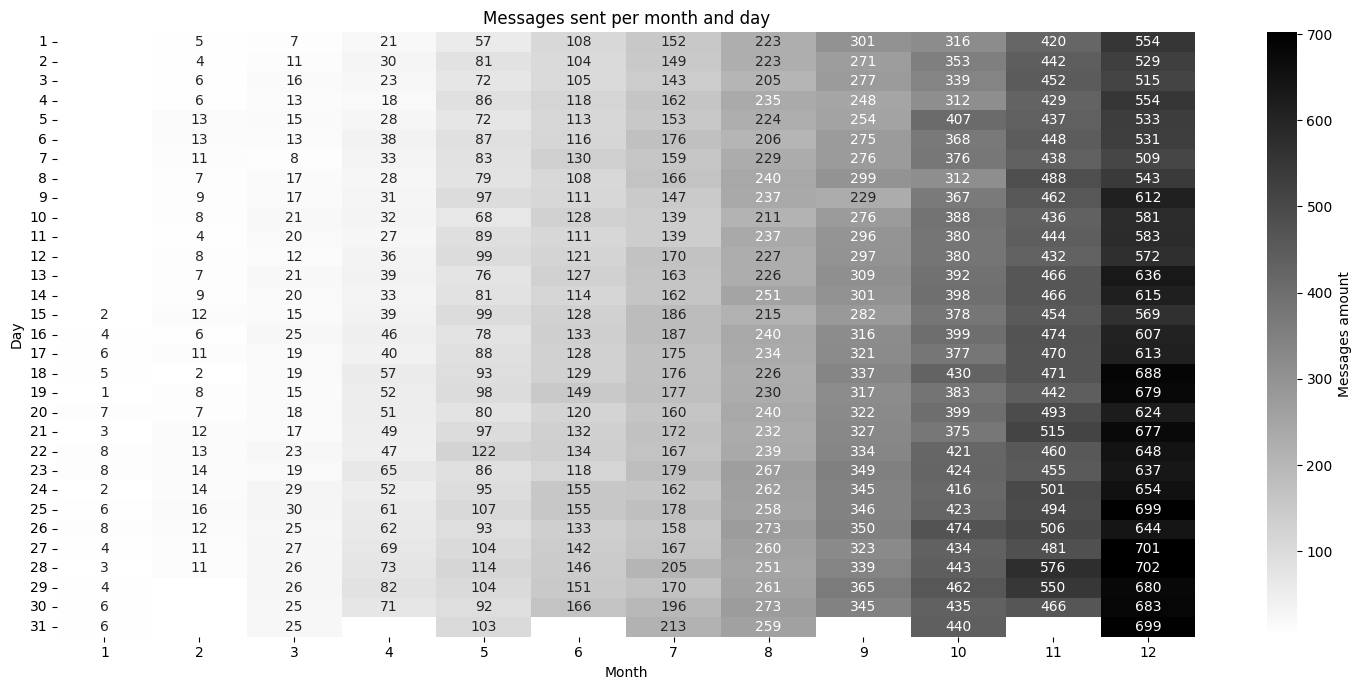

In [40]:
# Messages Activity per day and month
heatmap_data = df_messages_periodic_day.pivot(index='day', columns= 'month', values='message_count')

plot_heatmap(heatmap_data, annot=True, title='Messages sent per month and day', xlabel='Month', ylabel='Day', cmap='binary', 
             cbar_label='Messages amount', fmt='.0f')

3.4.3 Data visalization for Internet traffic amount acivity per day and month

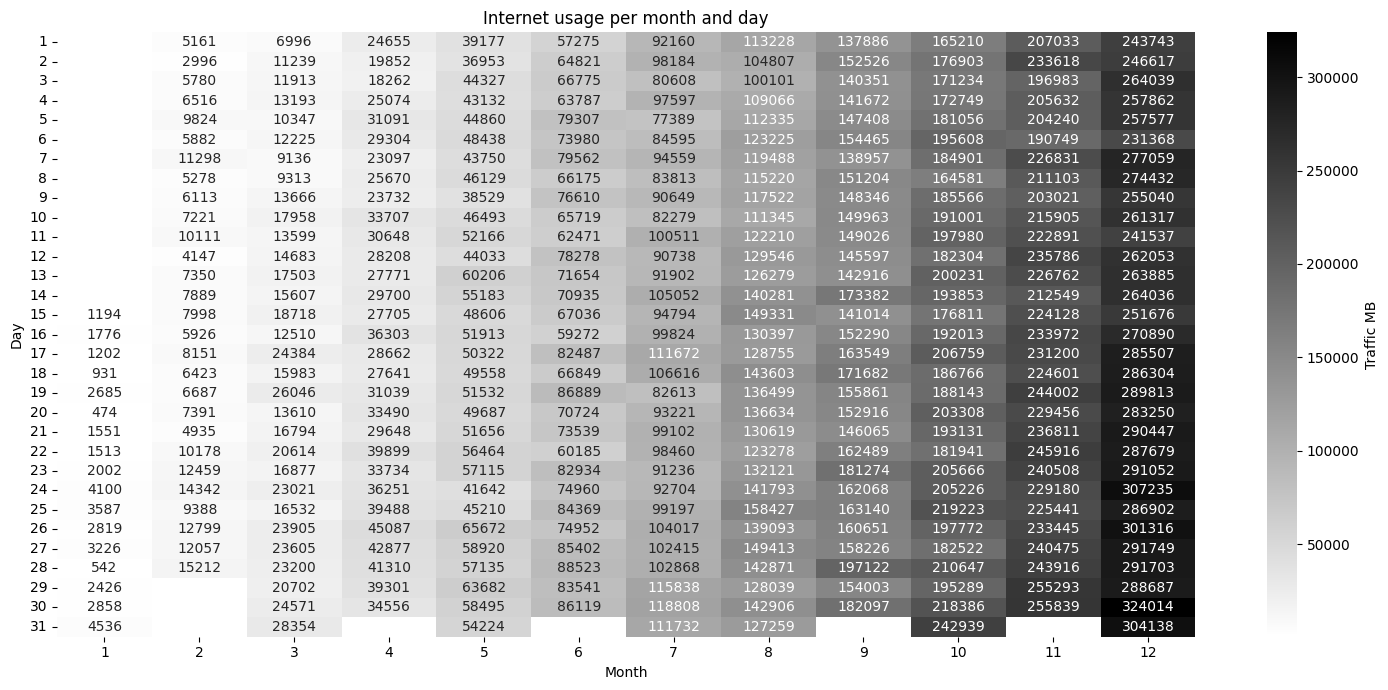

In [41]:
# Internet traffic Activity per day and month
heatmap_data = df_internet_periodic_day.pivot(index='day', columns= 'month', values='traffic_usage')

plot_heatmap(heatmap_data, annot=True, title='Internet usage per month and day', xlabel='Month', ylabel='Day', cmap='binary', 
             cbar_label='Traffic MB', fmt='.0f')

#### 3.5 Data visualization for Voice services

In [42]:
df_calls = df_revenue_total.groupby('month')[['total_month_calls', 'total_month_duration']].sum().reset_index()
df_calls

,month,total_month_calls,total_month_duration
0,1,172.0,1180.0
1,2,774.0,5495.0
2,3,1620.0,11241.0
3,4,3442.0,24651.0
4,5,5959.0,42549.0
5,6,8221.0,59271.0
6,7,11105.0,79645.0
7,8,13590.0,96360.0
8,9,16523.0,117986.0
9,10,21064.0,149624.0


In [43]:
df_calls_cat = df_calls.melt(id_vars='month', 
                        value_vars=['total_month_calls', 'total_month_duration'],
                        var_name='type', 
                        value_name='value')
df_calls_cat

,month,type,value
0,1,total_month...,172.0
1,2,total_month...,774.0
2,3,total_month...,1620.0
3,4,total_month...,3442.0
4,5,total_month...,5959.0
5,6,total_month...,8221.0
6,7,total_month...,11105.0
7,8,total_month...,13590.0
8,9,total_month...,16523.0
9,10,total_month...,21064.0


c:\Users\luisp\OneDrive\Documentos\GitHub\P_20250514_Mobile_service_plans_analysis\src\eda.py:465: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data=ds, x=x_col, y=y_col, hue=hue_col, palette=strong_palette, alpha=alpha)


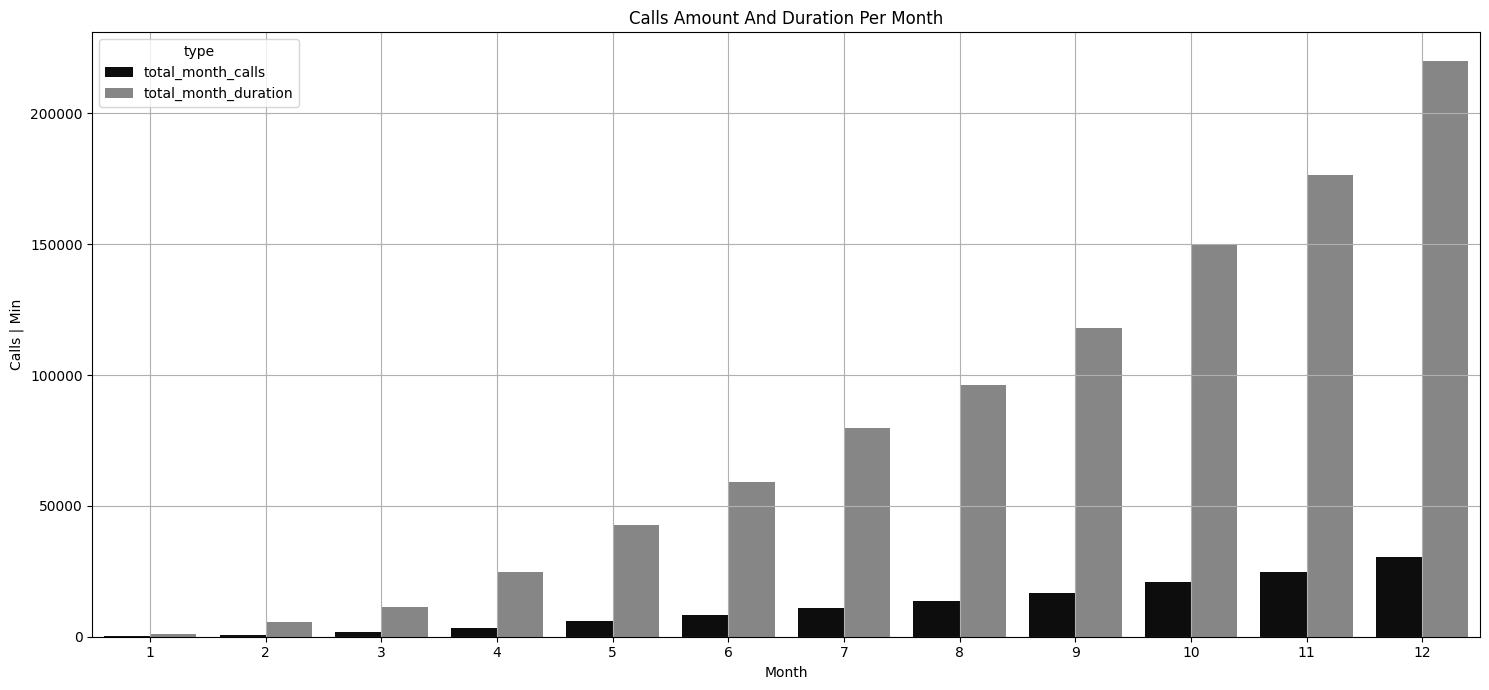

In [44]:
plot_grouped_barplot(df_calls_cat, x_col='month', y_col='value', hue_col='type', palette=['black', 'grey'],
                     title='Calls Amount And Duration Per Month', xlabel='Month', ylabel='Calls | Min', x_rotation=0, y_rotation=0)

#### 3.6 Data visualization for Data services

In [45]:
df_traffic = df_revenue_total.groupby('month')[['total_month_sessions', 'total_month_traffic']].sum().reset_index()
df_traffic

,month,total_month_sessions,total_month_traffic
0,1,96.0,39000.0
1,2,604.0,237000.0
2,3,1336.0,543000.0
3,4,2558.0,967000.0
4,5,4288.0,1608000.0
5,6,6057.0,2273000.0
6,7,8110.0,3085000.0
7,8,10718.0,4100000.0
8,9,12722.0,4820000.0
9,10,16193.0,6129000.0


In [46]:
df_traffic_cat = df_traffic.melt(id_vars='month', 
                        value_vars=['total_month_sessions', 'total_month_traffic'],
                        var_name='type', 
                        value_name='value')
df_traffic_cat

,month,type,value
0,1,total_month...,96.0
1,2,total_month...,604.0
2,3,total_month...,1336.0
3,4,total_month...,2558.0
4,5,total_month...,4288.0
5,6,total_month...,6057.0
6,7,total_month...,8110.0
7,8,total_month...,10718.0
8,9,total_month...,12722.0
9,10,total_month...,16193.0


c:\Users\luisp\OneDrive\Documentos\GitHub\P_20250514_Mobile_service_plans_analysis\src\eda.py:465: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data=ds, x=x_col, y=y_col, hue=hue_col, palette=strong_palette, alpha=alpha)


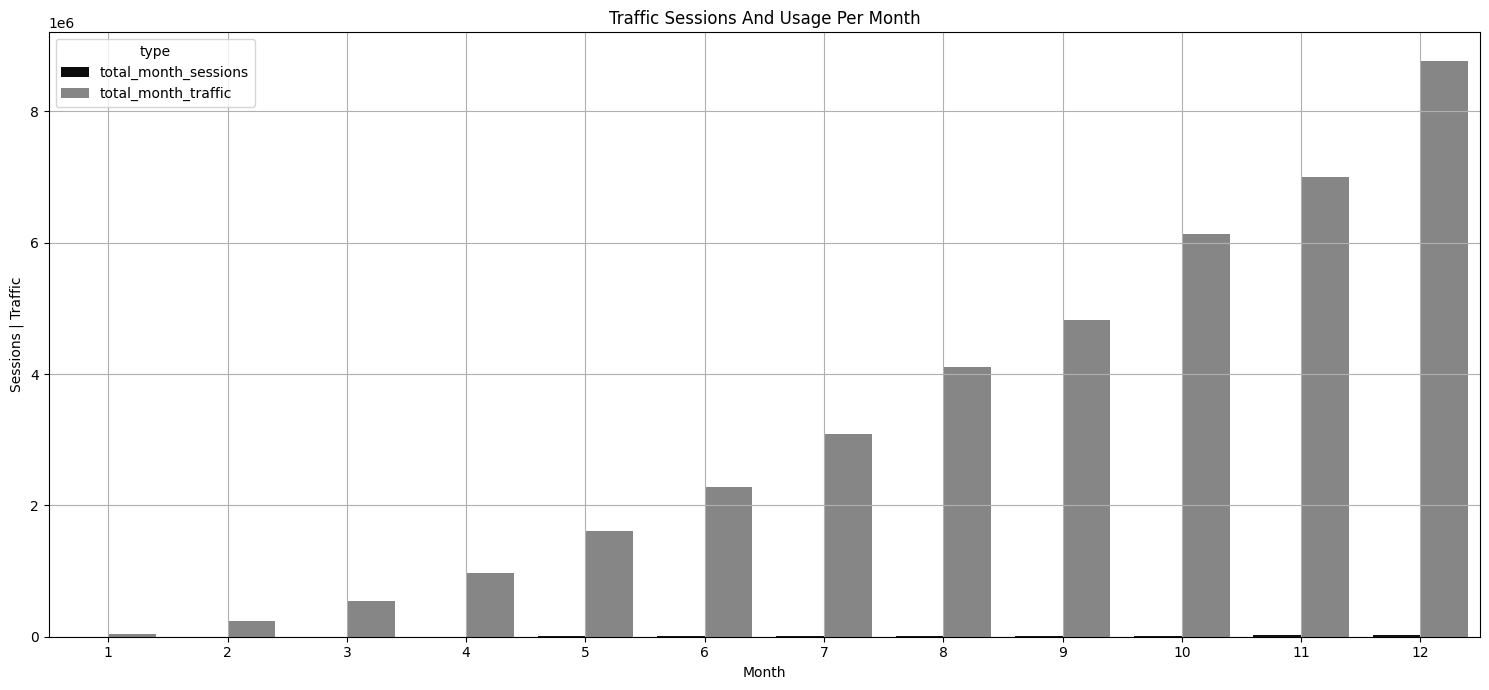

In [47]:
plot_grouped_barplot(df_traffic_cat, x_col='month', y_col='value', hue_col='type', palette=['black', 'grey'],
                     title='Traffic Sessions And Usage Per Month', xlabel='Month', ylabel='Sessions | Traffic', x_rotation=0, y_rotation=0)

#### 3.7 Data visualization for Services average per plan

3.7.1 Data visualization for Call services average per plan

In [48]:
df_median_duration_calls_per_plan_month = df_revenue_total.pivot_table(index='plan', columns='month',
                                                                       values='total_month_duration', aggfunc='median')
df_median_duration_calls_per_plan_month

month,1,2,3,4,5,6,7,8,9,10,11,12
plan,,,,,,,,,,,,
surf,203.0,254.0,334.0,339.5,429.0,432.0,458.5,395.0,429.0,437.0,419.0,453.0
ultimate,234.0,473.5,251.0,301.0,407.0,400.0,430.0,406.0,434.0,461.0,432.5,445.0


In [49]:
df_median_duration_calls_per_plan_month = df_median_duration_calls_per_plan_month.reset_index().melt(
    id_vars='plan',
    var_name='month',
    value_name='median_duration'
)

print(df_median_duration_calls_per_plan_month)

        plan month  median_duration
0       surf     1           203.0 
1   ultimate     1           234.0 
2       surf     2           254.0 
3   ultimate     2           473.5 
4       surf     3           334.0 
5   ultimate     3           251.0 
6       surf     4           339.5 
7   ultimate     4           301.0 
8       surf     5           429.0 
9   ultimate     5           407.0 
10      surf     6           432.0 
11  ultimate     6           400.0 
12      surf     7           458.5 
13  ultimate     7           430.0 
14      surf     8           395.0 
15  ultimate     8           406.0 
16      surf     9           429.0 
17  ultimate     9           434.0 
18      surf    10           437.0 
19  ultimate    10           461.0 
20      surf    11           419.0 
21  ultimate    11           432.5 
22      surf    12           453.0 
23  ultimate    12           445.0 


c:\Users\luisp\OneDrive\Documentos\GitHub\P_20250514_Mobile_service_plans_analysis\src\eda.py:465: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data=ds, x=x_col, y=y_col, hue=hue_col, palette=strong_palette, alpha=alpha)


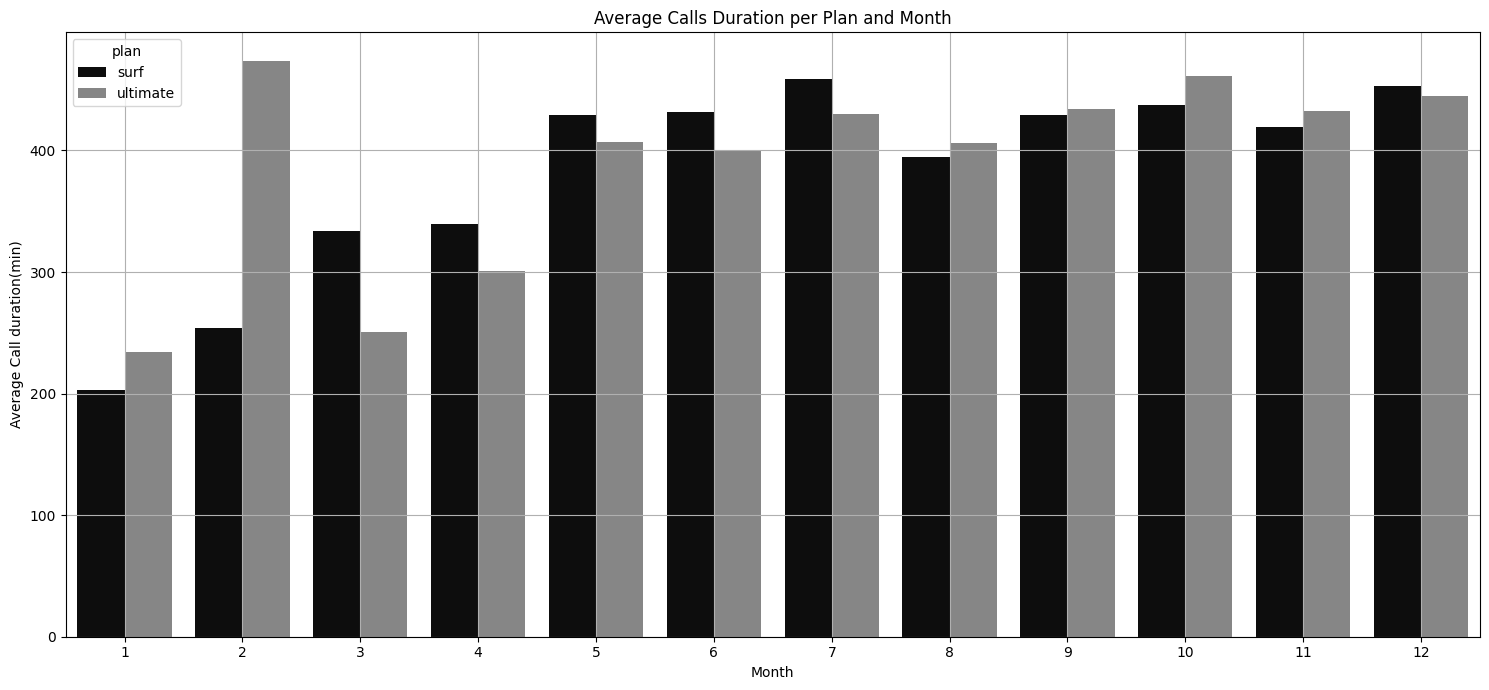

In [50]:
plot_grouped_barplot(df_median_duration_calls_per_plan_month, x_col='month', y_col='median_duration', hue_col='plan', palette=['black', 'grey'],
                     title='Average Calls Duration per Plan and Month', xlabel='Month', ylabel='Average Call duration(min)', x_rotation=0, y_rotation=0)

In [51]:
surf_duration = df_revenue_total.loc[(df_revenue_total['plan'] == 'surf'), 'total_month_duration']
ultimate_duration = df_revenue_total.loc[(df_revenue_total['plan'] == 'ultimate'), 'total_month_duration']


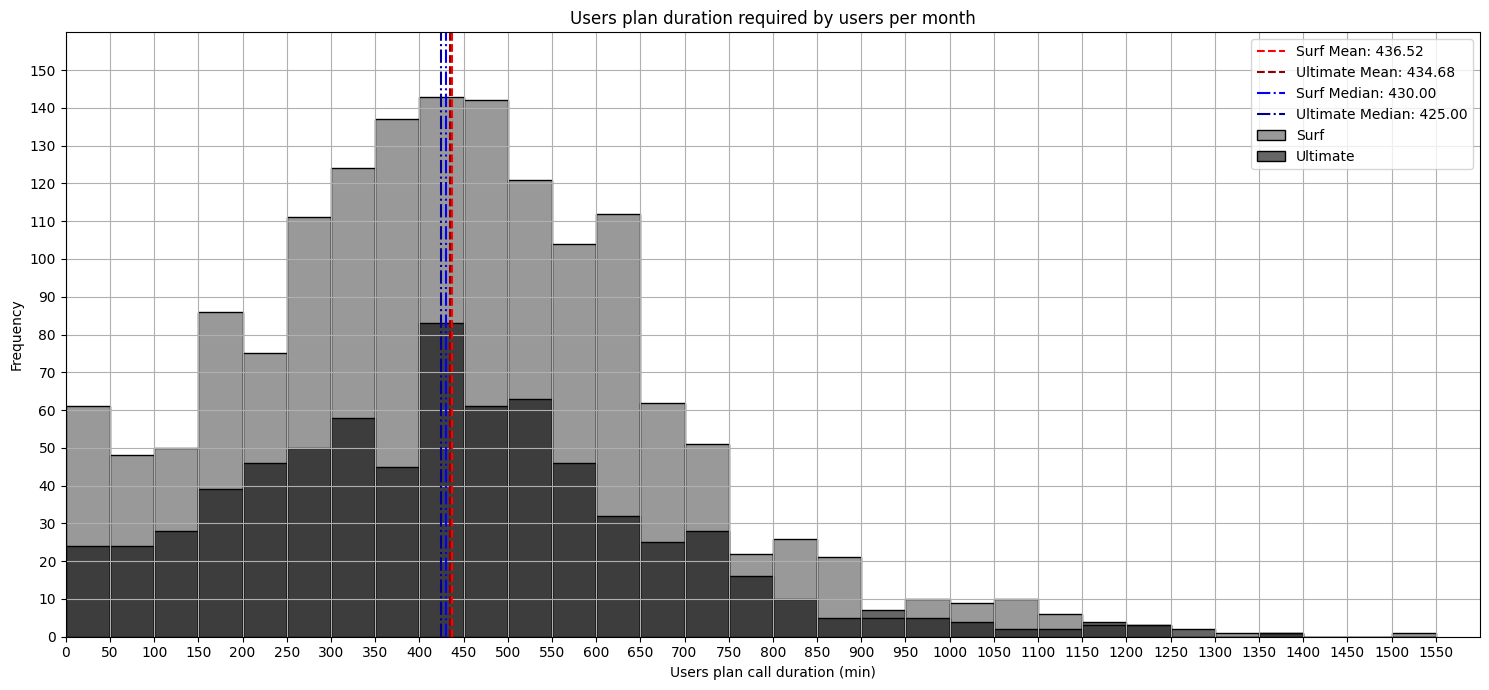

In [61]:
plot_dual_histogram(surf_duration, ultimate_duration, bins=range(0, 1600, 50), color1='grey', color2='black', 
                    title='Users plan duration required by users per month', xlabel='Users plan call duration (min)', ylabel='Frequency', label1='Surf',
                    label2='Ultimate', xticks_range=(0, 1600, 50), yticks_range=(0, 160, 10),rotation=0)

3.7.2 Data visualization for Messages services average per plan

In [53]:
df_median_messages_per_plan_month = df_revenue_total.pivot_table(index='plan', columns='month',
                                                                           values='total_month_messages', aggfunc='median')
df_median_messages_per_plan_month

month,1,2,3,4,5,6,7,8,9,10,11,12
plan,,,,,,,,,,,,
surf,21.0,11.0,18.5,18.5,26.0,27.0,30.0,31.0,31.0,35.0,33.0,38.0
ultimate,23.0,19.0,26.0,20.5,35.0,31.0,35.0,42.0,47.0,40.0,41.0,48.5


In [54]:
df_median_messages_per_plan_month = df_median_messages_per_plan_month.reset_index().melt(
    id_vars='plan',
    var_name='month',
    value_name='median_messages'
)

df_median_messages_per_plan_month

,plan,month,median_messages
0,surf,1,21.0
1,ultimate,1,23.0
2,surf,2,11.0
3,ultimate,2,19.0
4,surf,3,18.5
5,ultimate,3,26.0
6,surf,4,18.5
7,ultimate,4,20.5
8,surf,5,26.0
9,ultimate,5,35.0


c:\Users\luisp\OneDrive\Documentos\GitHub\P_20250514_Mobile_service_plans_analysis\src\eda.py:465: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data=ds, x=x_col, y=y_col, hue=hue_col, palette=strong_palette, alpha=alpha)


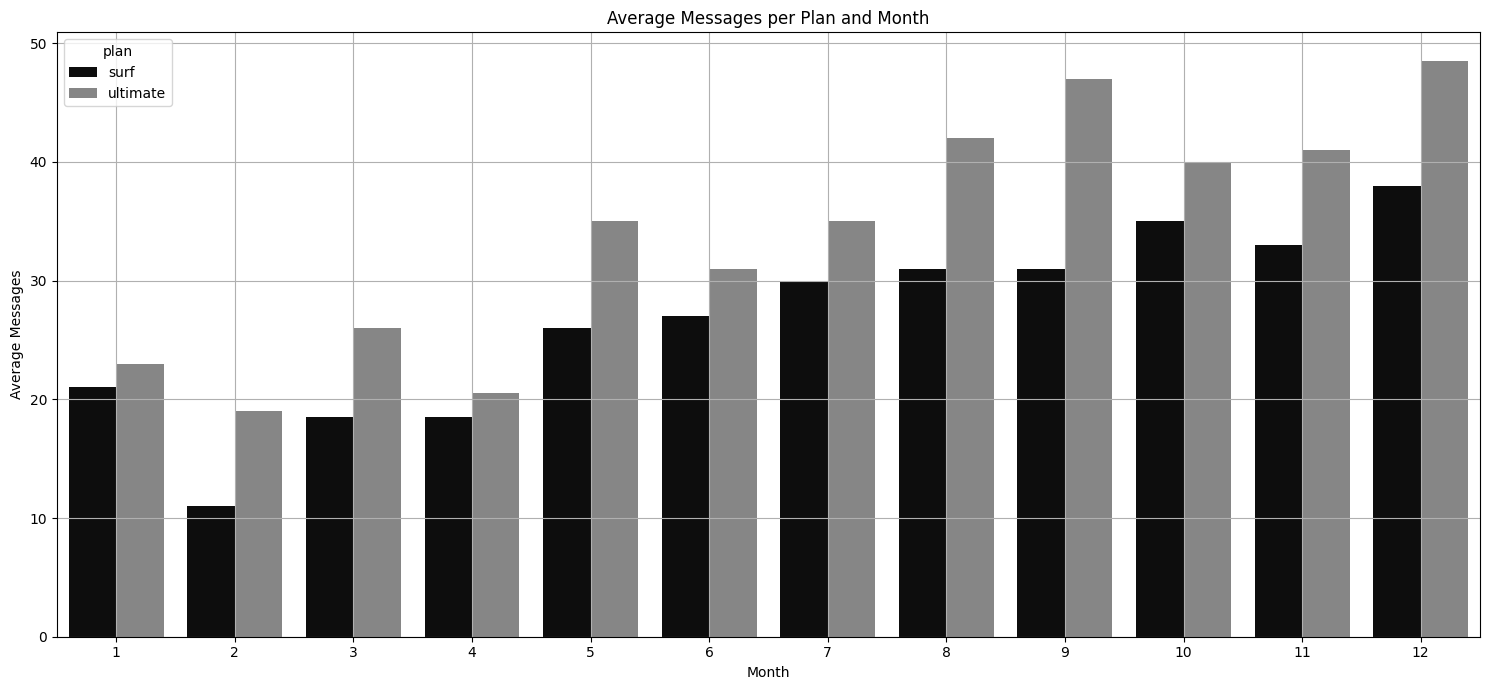

In [55]:
plot_grouped_barplot(df_median_messages_per_plan_month, x_col='month', y_col='median_messages', hue_col='plan', palette=['black', 'grey'],
                     title='Average Messages per Plan and Month', xlabel='Month', ylabel='Average Messages', x_rotation=0, y_rotation=0)

In [56]:
surf_messages = df_revenue_total.loc[(df_revenue_total['plan'] == 'surf'), 'total_month_messages']
ultimate_messages = df_revenue_total.loc[(df_revenue_total['plan'] == 'ultimate'), 'total_month_messages']

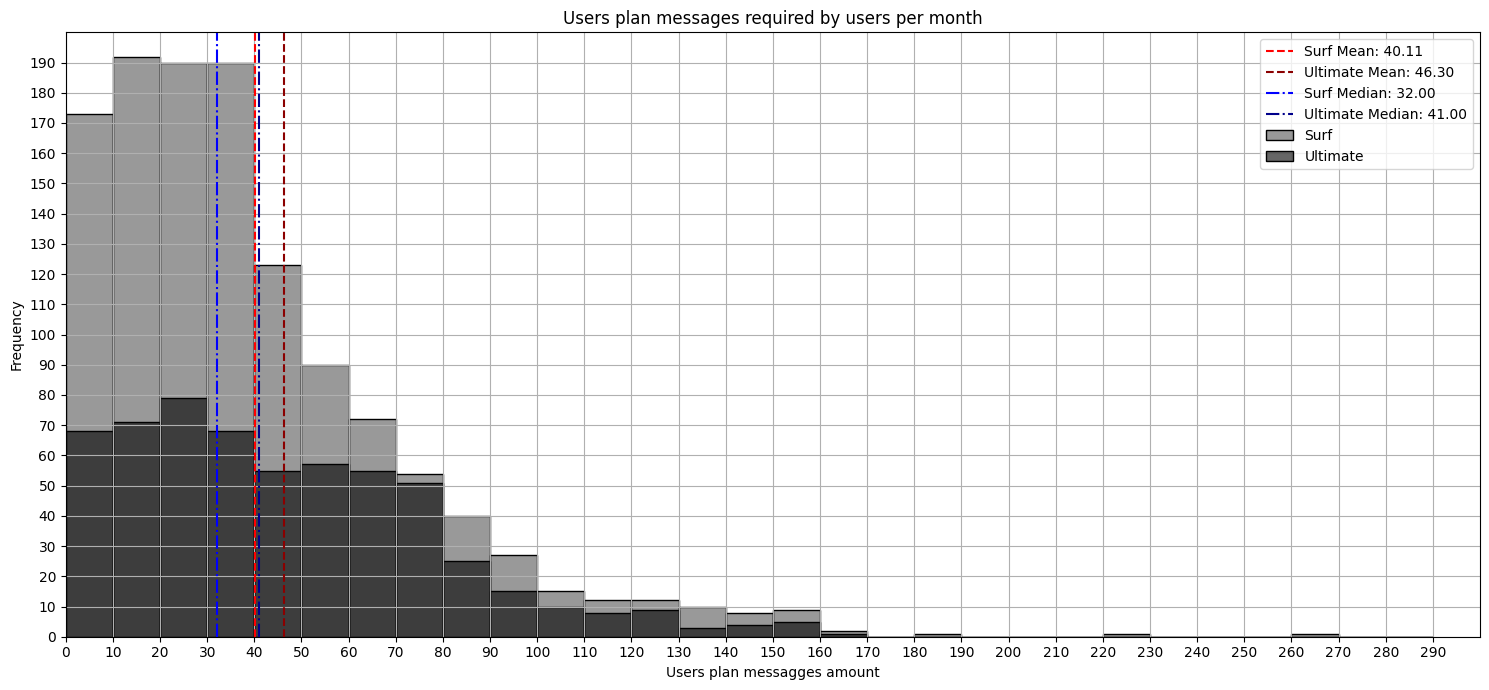

In [64]:
plot_dual_histogram(surf_messages, ultimate_messages, bins=range(0, 300, 10), color1='grey', color2='black', 
                    title='Users plan messages required by users per month', xlabel='Users plan messagges amount', ylabel='Frequency', label1='Surf',
                    label2='Ultimate', xticks_range=(0, 300, 10), yticks_range=(0, 200, 10), rotation=0)

3.7.3 Data visualization for Internet services average per plan

In [65]:
df_median_traffic_per_plan_month = df_revenue_total.pivot_table(index='plan', columns='month',
values='total_month_traffic', aggfunc='median')

df_median_traffic_per_plan_month

month,1,2,3,4,5,6,7,8,9,10,11,12
plan,,,,,,,,,,,,
surf,5000.0,12000.0,14000.0,12000.0,14500.0,16000.0,17500.0,18000.0,17000.0,18000.0,17000.0,18000.0
ultimate,8000.0,21000.0,21000.0,16000.0,17000.0,16000.0,16000.0,18000.0,17000.0,17000.0,18000.0,18000.0


In [66]:
df_median_traffic_per_plan_month = df_median_traffic_per_plan_month.reset_index().melt(
    id_vars='plan',
    var_name='month',
    value_name='median_traffic'
)

df_median_traffic_per_plan_month

,plan,month,median_traffic
0,surf,1,5000.0
1,ultimate,1,8000.0
2,surf,2,12000.0
3,ultimate,2,21000.0
4,surf,3,14000.0
5,ultimate,3,21000.0
6,surf,4,12000.0
7,ultimate,4,16000.0
8,surf,5,14500.0
9,ultimate,5,17000.0


c:\Users\luisp\OneDrive\Documentos\GitHub\P_20250514_Mobile_service_plans_analysis\src\eda.py:465: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data=ds, x=x_col, y=y_col, hue=hue_col, palette=strong_palette, alpha=alpha)


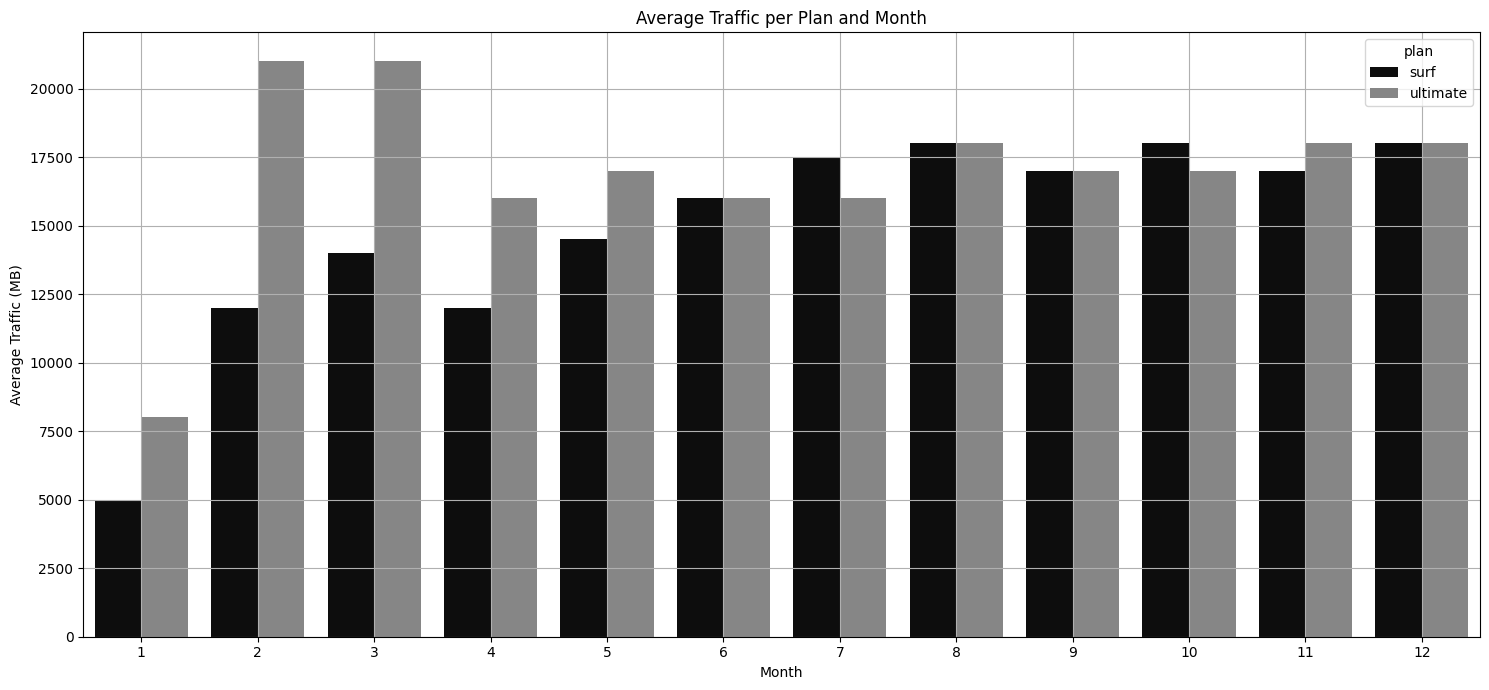

In [67]:
plot_grouped_barplot(df_median_traffic_per_plan_month, x_col='month', y_col='median_traffic', hue_col='plan', palette=['black', 'grey'],
                     title='Average Traffic per Plan and Month', xlabel='Month', ylabel='Average Traffic (MB)', x_rotation=0, y_rotation=0)

In [69]:
surf_traffic = df_revenue_total.loc[(df_revenue_total['plan'] == 'surf'), 'total_month_traffic']
ultimate_traffic = df_revenue_total.loc[(df_revenue_total['plan'] == 'ultimate'), 'total_month_traffic']

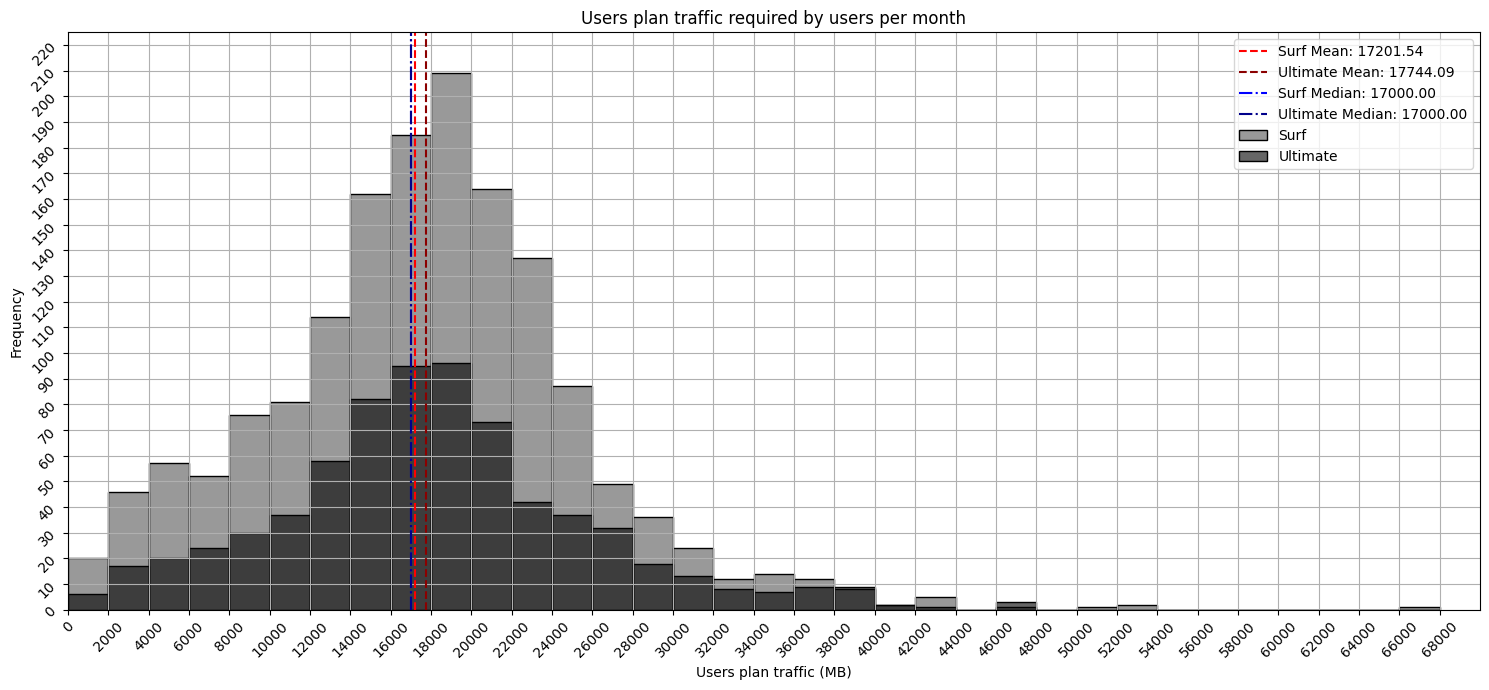

In [74]:
plot_dual_histogram(surf_traffic, ultimate_traffic, bins=range(0, 70000, 2000), color1='grey', color2='black', 
                    title='Users plan traffic required by users per month', xlabel='Users plan traffic (MB)', ylabel='Frequency', label1='Surf',
                    label2='Ultimate', xticks_range=(0, 70000, 2000), yticks_range=(0, 225, 10), rotation=45)

#### 3.8 Data visualization for Revenue average per plan

In [81]:
df_median_income_calls_per_plan_month = df_revenue_total.pivot_table(index='plan', columns='month',
values='month_revenue_calls', aggfunc='median')
df_median_income_calls_per_plan_month

month,1,2,3,4,5,6,7,8,9,10,11,12
plan,,,,,,,,,,,,
surf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ultimate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
df_median_income_calls_per_plan_month = df_median_income_calls_per_plan_month.reset_index().melt(
    id_vars='plan',
    var_name='month',
    value_name='median_calls_revenue'
)

df_median_income_calls_per_plan_month

,plan,month,median_calls_revenue
0,surf,1,0.0
1,ultimate,1,0.0
2,surf,2,0.0
3,ultimate,2,0.0
4,surf,3,0.0
5,ultimate,3,0.0
6,surf,4,0.0
7,ultimate,4,0.0
8,surf,5,0.0
9,ultimate,5,0.0


c:\Users\luisp\OneDrive\Documentos\GitHub\P_20250514_Mobile_service_plans_analysis\src\eda.py:465: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data=ds, x=x_col, y=y_col, hue=hue_col, palette=strong_palette, alpha=alpha)


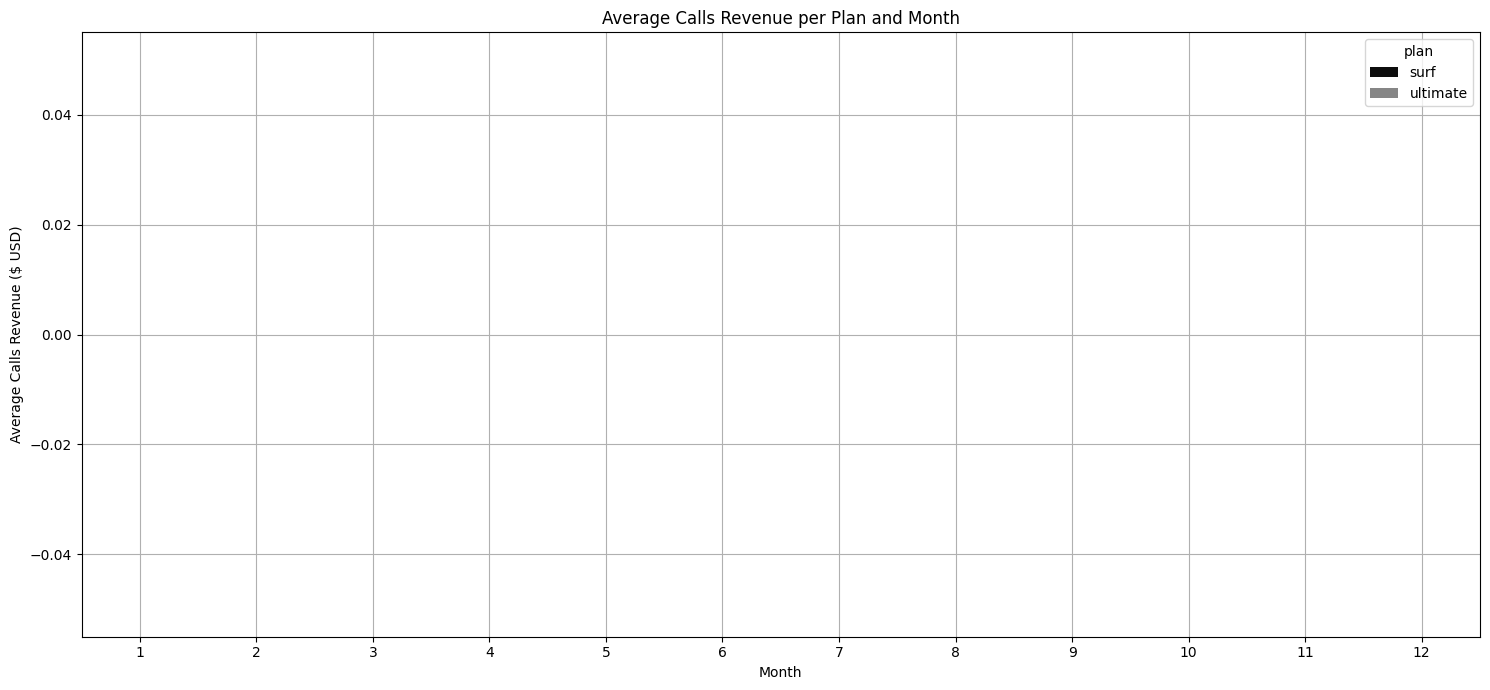

In [83]:
plot_grouped_barplot(df_median_income_calls_per_plan_month, x_col='month', y_col='median_calls_revenue', hue_col='plan', palette=['black', 'grey'],
                     title='Average Calls Revenue per Plan and Month', xlabel='Month', ylabel='Average Calls Revenue ($ USD)', x_rotation=0, y_rotation=0)

## 4. Conclusions and key insights

This exploratory data analysis reveals ...

### 🎯 Key Findings

🧠 Key Behavioral Insights

**Repurchase Rate Distribution**: Most products exhibit a low repurchase rate, with a small subset achieving significantly high loyalty. These high-performing products should be prioritized for promotions and availability.

**Add-to-Cart Position vs Reorder Rate**: A clear inverse relationship was identified — products added earlier to the cart are more likely to be reordered. This suggests early cart placement correlates with habitual purchasing.

**User Segmentation Patterns**: Users classified into "High" and "Very High" repurchase segments show concentrated behavior in higher reorder rate bins (≥ 0.6). These segments could be leveraged for retention and upsell strategies.

**First-time Preferences**: A subset of products consistently appears as the first item in a cart. These may act as "trigger products" and can be used to design product bundles or targeted recommendations.

📦 Product-Level Trends

**Highly Reordered Products**: Certain SKUs show repurchase rates exceeding 0.8 with high frequency — a signal of strong customer affinity. These should be considered anchor products in marketing strategies.

**Repurchase Concentration**: A small number of products contribute disproportionately to reorder volume.

**Outlier Detection**: Products with abnormally high or low reorder metrics were detected and analyzed. These outliers may represent anomalies, promotional spikes, or seasonal trends.  

### 🧠 Conclusion: User Activity Patterns by Orders and  Products

**Prioritize High Repurchase Segments**: Focus personalized campaigns on users within "High" and "Very High" segments — they demonstrate repeat engagement and are ideal for loyalty programs.

**Optimize Product Placement**: Improve visibility of items that frequently appear early in carts to influence overall order composition.

**Leverage Trigger Products**: Explore the use of top “first-added” products as entry points for cross-selling strategies.

**Refine Forecast Models**: Use repurchase rates and segment trends to enhance demand prediction and inventory planning accuracy.
